In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tg-gan-checkpoints/gan_transformer_checkpoint.pth
/kaggle/input/bci-competition-iv-dataset-2b/B0102T.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0705E.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0505E.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0801T.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0502T.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0404E.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0903T.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0202T.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0402T.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0905E.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0303T.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0604E.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0205E.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0703T.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0704E.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0304E.gdf
/kaggle/input/bci-competition-iv-dataset-2b/B0501T.gdf
/

In [2]:
import matplotlib.pyplot as plt

# MNE is essential for loading and processing EEG data
import mne

# To list files
import glob

In [3]:
dataset_path = '../input/bci-competition-iv-dataset-2b/' # Adjust if the folder structure is different
gdf_files = glob.glob(os.path.join(dataset_path, '*.gdf'))
event_files = glob.glob(os.path.join(dataset_path, '*events.txt')) # Or whatever the event file extension is
info_files = glob.glob(os.path.join(dataset_path, '*.txt')) # Look for any readme or info files

print("GDF Files found:", gdf_files)
print("Event Files found (example name):", event_files) # Event files might be named differently or embedded
print("Other TXT/Info Files found:", info_files)

# It's also good to list all files to be sure
# for dirname, _, filenames in os.walk(dataset_path):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

GDF Files found: ['../input/bci-competition-iv-dataset-2b/B0102T.gdf', '../input/bci-competition-iv-dataset-2b/B0705E.gdf', '../input/bci-competition-iv-dataset-2b/B0505E.gdf', '../input/bci-competition-iv-dataset-2b/B0801T.gdf', '../input/bci-competition-iv-dataset-2b/B0502T.gdf', '../input/bci-competition-iv-dataset-2b/B0404E.gdf', '../input/bci-competition-iv-dataset-2b/B0903T.gdf', '../input/bci-competition-iv-dataset-2b/B0202T.gdf', '../input/bci-competition-iv-dataset-2b/B0402T.gdf', '../input/bci-competition-iv-dataset-2b/B0905E.gdf', '../input/bci-competition-iv-dataset-2b/B0303T.gdf', '../input/bci-competition-iv-dataset-2b/B0604E.gdf', '../input/bci-competition-iv-dataset-2b/B0205E.gdf', '../input/bci-competition-iv-dataset-2b/B0703T.gdf', '../input/bci-competition-iv-dataset-2b/B0704E.gdf', '../input/bci-competition-iv-dataset-2b/B0304E.gdf', '../input/bci-competition-iv-dataset-2b/B0501T.gdf', '../input/bci-competition-iv-dataset-2b/B0201T.gdf', '../input/bci-competition-iv

In [4]:
# Select one GDF file to explore
if gdf_files:
    # Let's pick the first GDF file for now
    example_gdf_file = gdf_files[0]
    print(f"Loading GDF file: {example_gdf_file}")

    # Load the GDF file
    # You might need to adjust preload=True based on memory constraints for very large files
    try:
        raw = mne.io.read_raw_gdf(example_gdf_file, preload=True, verbose='WARNING')
        print("Successfully loaded the GDF file.")
    except Exception as e:
        print(f"Error loading GDF file: {e}")
        print("You might need to install a specific GDF reader or check the file integrity.")
        # If standard MNE fails, sometimes specific GDF readers might be needed,
        # but for BCI competition data, MNE usually works.
else:
    print("No GDF files found. Please check the dataset path and file names.")
    raw = None # Define raw as None if no file is loaded

Loading GDF file: ../input/bci-competition-iv-dataset-2b/B0102T.gdf


/tmp/ipykernel_35/494013113.py:10: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(example_gdf_file, preload=True, verbose='WARNING')


Successfully loaded the GDF file.


In [5]:
if raw:
    # Print basic information
    print(raw)
    print("\nInformation about the data (info object):")
    print(raw.info)

    # Number of channels
    print(f"\nNumber of channels: {raw.info['nchan']}")

    # Channel names
    print(f"\nChannel names: {raw.info['ch_names']}")

    # Sampling frequency
    sfreq = raw.info['sfreq']
    print(f"\nSampling frequency: {sfreq} Hz")

    # Duration of the recording
    duration = raw.n_times / sfreq
    print(f"\nDuration of recording: {duration:.2f} seconds")

    # Get channel types (EEG, EOG, EMG, STIM, etc.)
    # MNE tries to infer them, but you might need to set them manually for some channels
    print(f"\nChannel types: {raw.get_channel_types(unique=True)}")

    # You might need to set channel types if they are not correctly inferred
    # For this dataset, the first few channels are EEG, and the last few are often EOG
    # Example (ADJUST BASED ON ACTUAL DATASET DOCUMENTATION):
    # eeg_channels = raw.info['ch_names'][:3] # Assuming first 3 are EEG
    # eog_channels = raw.info['ch_names'][3:6] # Assuming next 3 are EOG
    # mapping = {}
    # for ch in eeg_channels: mapping[ch] = 'eeg'
    # for ch in eog_channels: mapping[ch] = 'eog'
    # raw.set_channel_types(mapping)
    # print(f"Updated channel types: {raw.get_channel_types(unique=True)}")
else:
    print("Raw data not loaded, skipping information display.")

<RawGDF | B0102T.gdf, 6 x 552452 (2209.8 s), ~25.3 MiB, data loaded>

Information about the data (info object):
<Info | 8 non-empty values
 bads: []
 ch_names: EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
 chs: 6 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2005-11-07 16:38:57 UTC
 nchan: 6
 projs: []
 sfreq: 250.0 Hz
 subject_info: <subject_info | his_id: B01, sex: 0, last_name: X, birthday: 1984-12-01>
>

Number of channels: 6

Channel names: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']

Sampling frequency: 250.0 Hz

Duration of recording: 2209.81 seconds

Channel types: ['eeg']



Plotting raw data (first 10 seconds, first 5 channels)...
Using matplotlib as 2D backend.


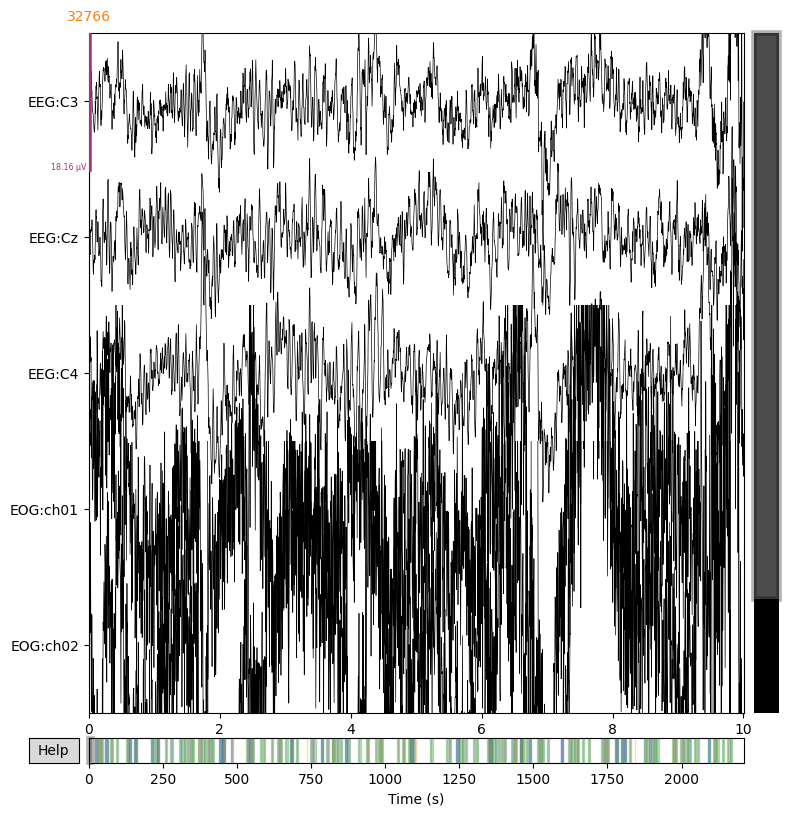

In [6]:
if raw:
    # Plot a segment of the raw data
    # Plot a few seconds, e.g., 10 seconds
    # You can specify which channels to plot using picks
    # Example: picks=['C3', 'Cz', 'C4'] if these are your EEG channels of interest
    print("\nPlotting raw data (first 10 seconds, first 5 channels)...")
    try:
        raw.plot(duration=10, n_channels=5, scalings='auto', block=False) # block=False for non-blocking plot in scripts
        plt.show() # In Kaggle, this might be needed, or plots might appear automatically
    except Exception as e:
        print(f"Could not plot raw data: {e}")

    # You can also plot specific channels:
    # eeg_channel_names = [ch for ch in raw.info['ch_names'] if 'EEG' in ch.upper() or ch in ['C3', 'Cz', 'C4']] # Heuristic
    # if not eeg_channel_names and len(raw.info['ch_names']) >=3: # Fallback if names are generic
    #    eeg_channel_names = raw.info['ch_names'][:3] # Assuming first 3 are EEG

    # if eeg_channel_names:
    #    print(f"\nPlotting specific EEG channels: {eeg_channel_names}")
    #    raw.plot(picks=eeg_channel_names, duration=10, scalings=dict(eeg=20e-6), block=False) # Typical EEG scaling
    #    plt.show()
    # else:
    #    print("Could not determine specific EEG channels for plotting by name.")

else:
    print("Raw data not loaded, skipping plotting.")

Data Extraction

In [7]:
dataset_path = '../input/bci-competition-iv-dataset-2b/' # Standard Kaggle input path
eeg_channels_of_interest = ['EEG:C3', 'EEG:Cz', 'EEG:C4']
eog_channels = ['EOG:ch01', 'EOG:ch02', 'EOG:ch03'] # Good to define to set their types correctly

In [8]:
import os
import glob
import mne
import numpy as np
import pandas as pd # Optional, for managing metadata
import traceback # For detailed error reporting

print(f"MNE version: {mne.__version__}")

dataset_path = '../input/bci-competition-iv-dataset-2b/'
eeg_channels_of_interest = ['EEG:C3', 'EEG:Cz', 'EEG:C4']
eog_channels_for_typing = ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']

def extract_eeg_from_gdf(file_path, target_eeg_names, target_eog_names):
    """
    Loads a GDF file, sets channel types, picks specified EEG channels, and returns their data.
    """
    print(f"\n--- Processing file: {os.path.basename(file_path)} ---")
    try:
        # 1. Load GDF data
        raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')
        all_chs_in_file = raw.ch_names
        print(f"File {os.path.basename(file_path)}: Loaded. Channels found in file: {all_chs_in_file}. Initial types: {raw.get_channel_types(unique=True)}")

        # 2. Identify which of our target channels are actually in this file
        actual_eeg_chs_found_by_name = [ch for ch in target_eeg_names if ch in all_chs_in_file]
        actual_eog_chs_found_by_name = [ch for ch in target_eog_names if ch in all_chs_in_file]

        print(f"File {os.path.basename(file_path)}: Target EEG names found: {actual_eeg_chs_found_by_name}")
        print(f"File {os.path.basename(file_path)}: Target EOG names found: {actual_eog_chs_found_by_name}")

        # 3. Build the mapping to set channel types correctly
        type_mapping = {}
        for ch_name in actual_eeg_chs_found_by_name:
            type_mapping[ch_name] = 'eeg'
        for ch_name in actual_eog_chs_found_by_name:
            type_mapping[ch_name] = 'eog'

        if not type_mapping:
            print(f"File {os.path.basename(file_path)}: WARNING - None of the target EEG/EOG channels ({target_eeg_names} / {target_eog_names}) found by name. Cannot reliably set types or pick EEG data by specified names. Skipping this file.")
            return None, None
        
        raw.set_channel_types(type_mapping)
        print(f"File {os.path.basename(file_path)}: Applied type mapping: {type_mapping}. Current unique types: {raw.get_channel_types(unique=True)}")

        # 4. Pick only the channels now designated as 'eeg' (using their names)
        # actual_eeg_chs_found_by_name is already guaranteed to contain only channels present in raw.
        raw_eeg_picked = raw.copy().pick(actual_eeg_chs_found_by_name) # REMOVED on_missing='ignore'

        if not raw_eeg_picked.ch_names:
            print(f"File {os.path.basename(file_path)}: ERROR - No channels were picked from the list {actual_eeg_chs_found_by_name} after type setting. This is unexpected. Skipping file.")
            return None, None

        # Final check on picked channels' types
        picked_types = raw_eeg_picked.get_channel_types()
        if not all(ch_type == 'eeg' for ch_type in picked_types):
            print(f"File {os.path.basename(file_path)}: WARNING - Picked channels ({raw_eeg_picked.ch_names}) include non-EEG types: {picked_types} after picking by name. Original mapping was {type_mapping}. This could indicate an issue. Skipping file.")
            return None, None
            
        eeg_data = raw_eeg_picked.get_data()
        sfreq = raw_eeg_picked.info['sfreq']
        
        print(f"File {os.path.basename(file_path)}: SUCCESS - Extracted {eeg_data.shape[0]} EEG channels ({raw_eeg_picked.ch_names}), {eeg_data.shape[1]} samples, sfreq: {sfreq} Hz.")
        return eeg_data, sfreq
        
    except Exception as e:
        print(f"File {os.path.basename(file_path)}: CRITICAL ERROR - {e}")
        traceback.print_exc()
        return None, None

# --- Main loop (should be the same as before) ---
all_gdf_files = sorted(glob.glob(os.path.join(dataset_path, '*.gdf')))
all_eeg_data_list = []
file_metadata = [] # To store metadata like filename, original shape, etc.

print(f"Found {len(all_gdf_files)} GDF files to process.")

for gdf_file_path in all_gdf_files:
    # Use the corrected function here
    eeg_data, sfreq = extract_eeg_from_gdf(gdf_file_path, eeg_channels_of_interest, eog_channels_for_typing)
    
    if eeg_data is not None:
        all_eeg_data_list.append(eeg_data)
        # For metadata, it's safer to get channel names from the successfully picked object if possible
        # However, `raw_eeg_picked.ch_names` is not directly returned by the function.
        # For now, we'll assume the number of channels in eeg_data.shape[0] corresponds to our target channels.
        file_metadata.append({
            'filename': os.path.basename(gdf_file_path),
            'n_eeg_channels_extracted': eeg_data.shape[0],
            'n_timepoints': eeg_data.shape[1],
            'sampling_frequency': sfreq
            # 'extracted_channel_names': # This would be ideal to get from raw_eeg_picked.ch_names
        })
    else:
        print(f"File {os.path.basename(gdf_file_path)}: SKIPPED due to errors or inability to reliably extract target EEG channels.")

print(f"\n--- Processing Complete ---")
print(f"Successfully extracted EEG data from {len(all_eeg_data_list)} out of {len(all_gdf_files)} files.")

if all_eeg_data_list:
    metadata_df = pd.DataFrame(file_metadata)
    print("\nMetadata of extracted files (first 5):")
    print(metadata_df.head())
    if len(all_eeg_data_list) > 0 and all_eeg_data_list[0] is not None:
     print(f"\nShape of EEG data from the first successfully extracted file: {all_eeg_data_list[0].shape}")
else:
    print("No EEG data was extracted from any file.")

MNE version: 1.9.0
Found 45 GDF files to process.

--- Processing file: B0101T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0101T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0101T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0101T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0101T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0101T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0102T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0102T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0102T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0102T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0102T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0102T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 552452 samples, sfreq: 250.0 Hz.

--- Processing file: B0103T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0103T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0103T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0103T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0103T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0103T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 469011 samples, sfreq: 250.0 Hz.

--- Processing file: B0104E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0104E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0104E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0104E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0104E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0104E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 466314 samples, sfreq: 250.0 Hz.

--- Processing file: B0105E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0105E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0105E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0105E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0105E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0105E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 474363 samples, sfreq: 250.0 Hz.

--- Processing file: B0201T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0201T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0201T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0201T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0201T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0201T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0202T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0202T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0202T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0202T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0202T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0202T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0203T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0203T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0203T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0203T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0203T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0203T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 464155 samples, sfreq: 250.0 Hz.

--- Processing file: B0204E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0204E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0204E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0204E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0204E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0204E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 361830 samples, sfreq: 250.0 Hz.

--- Processing file: B0205E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0205E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0205E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0205E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0205E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0205E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 473687 samples, sfreq: 250.0 Hz.

--- Processing file: B0301T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0301T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0301T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0301T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0301T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0301T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0302T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0302T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0302T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0302T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0302T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0302T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0303T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0303T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0303T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0303T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0303T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0303T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 464675 samples, sfreq: 250.0 Hz.

--- Processing file: B0304E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0304E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0304E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0304E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0304E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0304E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 464675 samples, sfreq: 250.0 Hz.

--- Processing file: B0305E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0305E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0305E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0305E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0305E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0305E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 463619 samples, sfreq: 250.0 Hz.

--- Processing file: B0401T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0401T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0401T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0401T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0401T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0401T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0402T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0402T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0402T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0402T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0402T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0402T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 696266 samples, sfreq: 250.0 Hz.

--- Processing file: B0403T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0403T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0403T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0403T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0403T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0403T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 468559 samples, sfreq: 250.0 Hz.

--- Processing file: B0404E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0404E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0404E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0404E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0404E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0404E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 467479 samples, sfreq: 250.0 Hz.

--- Processing file: B0405E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0405E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0405E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0405E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0405E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0405E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 466051 samples, sfreq: 250.0 Hz.

--- Processing file: B0501T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0501T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0501T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0501T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0501T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0501T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0502T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0502T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0502T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0502T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0502T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0502T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 696266 samples, sfreq: 250.0 Hz.

--- Processing file: B0503T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0503T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0503T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0503T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0503T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0503T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 461875 samples, sfreq: 250.0 Hz.

--- Processing file: B0504E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0504E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0504E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0504E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0504E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0504E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 417020 samples, sfreq: 250.0 Hz.

--- Processing file: B0505E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0505E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0505E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0505E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0505E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0505E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 464959 samples, sfreq: 250.0 Hz.

--- Processing file: B0601T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0601T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0601T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0601T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0601T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0601T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0602T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0602T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0602T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0602T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0602T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0602T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0603T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0603T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0603T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0603T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0603T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0603T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 470391 samples, sfreq: 250.0 Hz.

--- Processing file: B0604E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0604E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0604E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0604E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0604E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0604E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 469991 samples, sfreq: 250.0 Hz.

--- Processing file: B0605E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0605E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0605E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0605E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0605E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0605E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 460903 samples, sfreq: 250.0 Hz.

--- Processing file: B0701T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0701T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0701T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0701T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0701T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0701T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0702T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0702T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0702T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0702T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0702T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0702T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0703T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0703T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0703T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0703T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0703T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0703T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 466727 samples, sfreq: 250.0 Hz.

--- Processing file: B0704E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0704E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0704E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0704E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0704E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0704E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 470344 samples, sfreq: 250.0 Hz.

--- Processing file: B0705E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0705E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0705E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0705E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0705E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0705E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 460895 samples, sfreq: 250.0 Hz.

--- Processing file: B0801T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0801T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0801T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0801T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0801T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0801T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 787729 samples, sfreq: 250.0 Hz.

--- Processing file: B0802T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0802T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0802T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0802T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0802T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0802T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0803T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0803T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0803T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0803T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0803T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0803T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 474835 samples, sfreq: 250.0 Hz.

--- Processing file: B0804E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0804E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0804E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0804E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0804E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0804E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 474835 samples, sfreq: 250.0 Hz.

--- Processing file: B0805E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0805E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0805E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0805E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0805E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0805E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 464307 samples, sfreq: 250.0 Hz.

--- Processing file: B0901T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0901T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0901T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0901T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0901T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0901T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0902T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0902T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0902T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0902T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0902T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0902T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 604803 samples, sfreq: 250.0 Hz.

--- Processing file: B0903T.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0903T.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0903T.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0903T.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0903T.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0903T.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 460731 samples, sfreq: 250.0 Hz.

--- Processing file: B0904E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0904E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0904E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0904E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0904E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0904E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 466803 samples, sfreq: 250.0 Hz.

--- Processing file: B0905E.gdf ---


/tmp/ipykernel_35/1408638122.py:21: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_gdf(file_path, preload=True, verbose='WARNING')


File B0905E.gdf: Loaded. Channels found in file: ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']. Initial types: ['eeg']
File B0905E.gdf: Target EEG names found: ['EEG:C3', 'EEG:Cz', 'EEG:C4']
File B0905E.gdf: Target EOG names found: ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
File B0905E.gdf: Applied type mapping: {'EEG:C3': 'eeg', 'EEG:Cz': 'eeg', 'EEG:C4': 'eeg', 'EOG:ch01': 'eog', 'EOG:ch02': 'eog', 'EOG:ch03': 'eog'}. Current unique types: ['eeg', 'eog']
File B0905E.gdf: SUCCESS - Extracted 3 EEG channels (['EEG:C3', 'EEG:Cz', 'EEG:C4']), 458571 samples, sfreq: 250.0 Hz.

--- Processing Complete ---
Successfully extracted EEG data from 45 out of 45 files.

Metadata of extracted files (first 5):
     filename  n_eeg_channels_extracted  n_timepoints  sampling_frequency
0  B0101T.gdf                         3        604803               250.0
1  B0102T.gdf                         3        552452               250.0
2  B0103T.gdf                         3        469011    

In [9]:
import numpy as np # Should already be imported

# Check the number of successfully processed files/datasets
print(f"Number of datasets in all_eeg_data_list: {len(all_eeg_data_list)}")

# Print the shape of each dataset (or a sample)
print("\nShapes of the first few datasets in the list:")
for i, eeg_data_array in enumerate(all_eeg_data_list[:5]): # Print shapes for the first 5
    print(f"Dataset {i} (from file: {file_metadata[i]['filename']}): shape {eeg_data_array.shape}")
    if eeg_data_array.shape[0] != 3:
        print(f"  WARNING: Dataset {i} does not have 3 channels!")

# If you want to check all of them (can be verbose if many files):
# print("\nShapes of all datasets in the list:")
# for i, eeg_data_array in enumerate(all_eeg_data_list):
#     print(f"Dataset {i} (from file: {file_metadata[i]['filename']}): shape {eeg_data_array.shape}")
#     if eeg_data_array.shape[0] != 3:
#         print(f"  WARNING: Dataset {i} does not have 3 channels!")

Number of datasets in all_eeg_data_list: 45

Shapes of the first few datasets in the list:
Dataset 0 (from file: B0101T.gdf): shape (3, 604803)
Dataset 1 (from file: B0102T.gdf): shape (3, 552452)
Dataset 2 (from file: B0103T.gdf): shape (3, 469011)
Dataset 3 (from file: B0104E.gdf): shape (3, 466314)
Dataset 4 (from file: B0105E.gdf): shape (3, 474363)


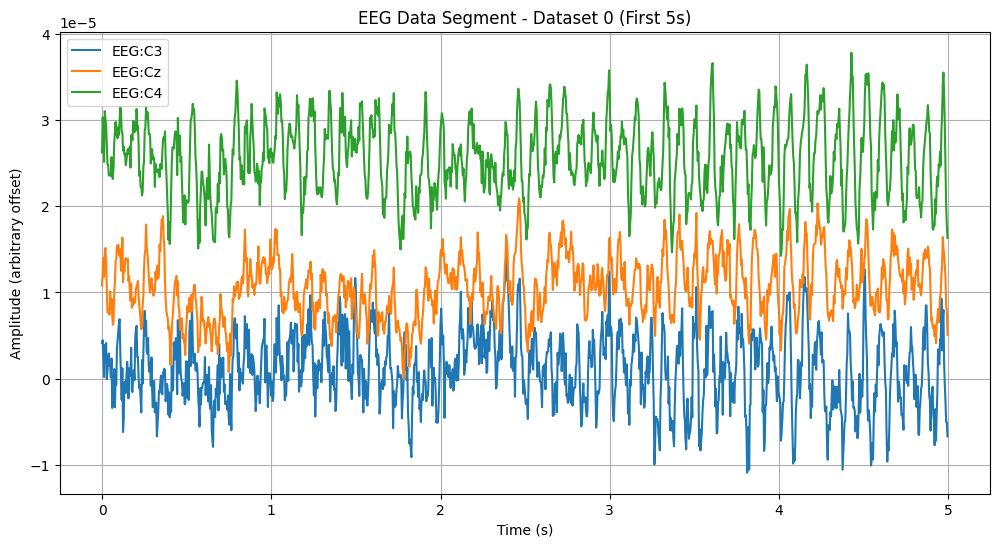

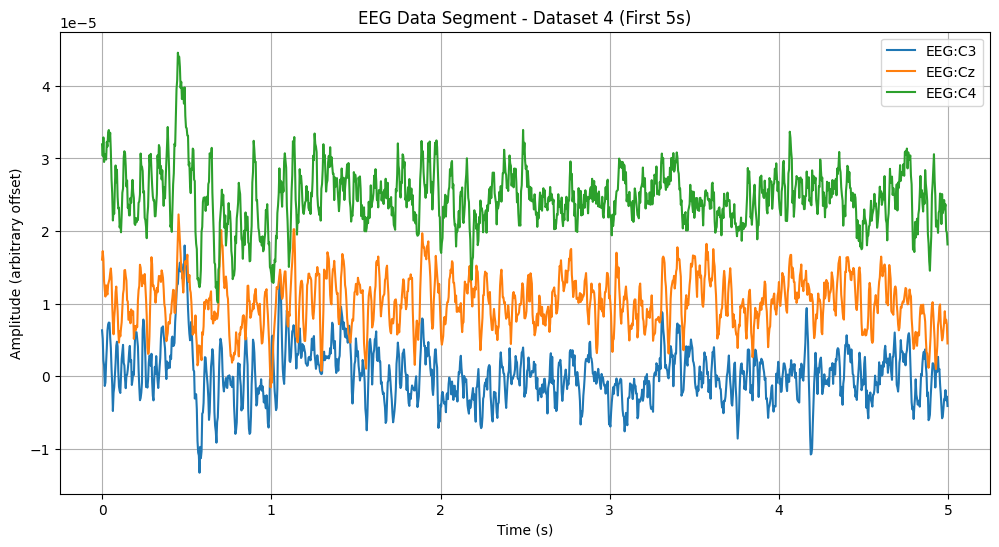

In [10]:
import matplotlib.pyplot as plt

def plot_eeg_segment(eeg_data, sfreq, dataset_index, n_seconds=5, channel_names=None):
    """Plots a segment of EEG data."""
    if channel_names is None:
        channel_names = [f"Channel {i+1}" for i in range(eeg_data.shape[0])]
    
    num_channels, total_samples = eeg_data.shape
    time_samples_to_plot = int(n_seconds * sfreq)
    if total_samples < time_samples_to_plot:
        time_samples_to_plot = total_samples # Plot all if shorter than n_seconds
        
    time_vector = np.arange(time_samples_to_plot) / sfreq
    
    plt.figure(figsize=(12, 6))
    for i in range(num_channels):
        # Offset channels vertically for better visualization
        plt.plot(time_vector, eeg_data[i, :time_samples_to_plot] + (i * np.std(eeg_data[i, :time_samples_to_plot]) * 3), label=channel_names[i])
        
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (arbitrary offset)")
    plt.title(f"EEG Data Segment - Dataset {dataset_index} (First {n_seconds}s)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot a segment from the first dataset
if all_eeg_data_list:
    sfreq = file_metadata[0]['sampling_frequency'] # Get sampling frequency from metadata
    # Using the eeg_channels_of_interest defined earlier
    plot_eeg_segment(all_eeg_data_list[0], sfreq, dataset_index=0, channel_names=eeg_channels_of_interest)

    # Optionally, plot from another dataset, e.g., the 5th one (index 4)
    if len(all_eeg_data_list) > 4:
        sfreq_other = file_metadata[4]['sampling_frequency']
        plot_eeg_segment(all_eeg_data_list[4], sfreq_other, dataset_index=4, channel_names=eeg_channels_of_interest)

Data Preparation for GAN

In [11]:
import numpy as np

def create_segments(eeg_data_list, segment_length_samples, overlap_samples=0):
    all_segments = []
    for eeg_data in eeg_data_list: # eeg_data is (channels, timepoints)
        num_channels, total_samples = eeg_data.shape

        step_size = segment_length_samples - overlap_samples

        for i in range(0, total_samples - segment_length_samples + 1, step_size):
            segment = eeg_data[:, i : i + segment_length_samples]
            all_segments.append(segment)

    if not all_segments:
        return np.array([]) # Return empty array if no segments created
    return np.stack(all_segments) # Shape: (num_segments, num_channels, segment_length_samples)

# --- Parameters for segmentation ---
SAMPLING_FREQUENCY = 250.0 # Hz (from your metadata)
SEGMENT_DURATION_SECONDS = 2 # Example: 2-second segments
segment_length_samples = int(SEGMENT_DURATION_SECONDS * SAMPLING_FREQUENCY)

# Example: 50% overlap
overlap_duration_seconds = 1.0
overlap_samples = int(overlap_duration_seconds * SAMPLING_FREQUENCY)

# If you don't want overlap, set overlap_samples = 0
# overlap_samples = 0

print(f"Segment length: {segment_length_samples} samples ({SEGMENT_DURATION_SECONDS}s)")
print(f"Overlap: {overlap_samples} samples ({overlap_duration_seconds if overlap_samples > 0 else 0}s)")

# Create segments from your extracted data
# all_eeg_data_list should be your list of (3, timepoints) arrays
segmented_eeg_data = create_segments(all_eeg_data_list, segment_length_samples, overlap_samples)

if segmented_eeg_data.size > 0:
    print(f"Total number of segments created: {segmented_eeg_data.shape[0]}")
    print(f"Shape of segmented data: {segmented_eeg_data.shape}") # (num_segments, 3_channels, segment_length_samples)
else:
    print("No segments were created. Check segment_length_samples vs. data length or overlap settings.")

Segment length: 500 samples (2s)
Overlap: 250 samples (1.0s)
Total number of segments created: 94527
Shape of segmented data: (94527, 3, 500)


In [12]:
def scale_data(data_array, new_min=-1, new_max=1):
    """Scales data to [new_min, new_max] range."""
    min_val = np.min(data_array)
    max_val = np.max(data_array)
    if max_val == min_val: # Avoid division by zero if data is flat
        return np.full(data_array.shape, new_min if min_val <=0 else (new_min+new_max)/2.0 ) # Or handle as error

    # Scale to [0,1]
    scaled_data = (data_array - min_val) / (max_val - min_val)
    # Then scale to [new_min, new_max]
    scaled_data = scaled_data * (new_max - new_min) + new_min
    return scaled_data, min_val, max_val # Return min/max for inverse scaling later

if segmented_eeg_data.size > 0:
    # Important: Calculate min/max over the entire segmented dataset for consistent scaling
    global_min = np.min(segmented_eeg_data)
    global_max = np.max(segmented_eeg_data)
    print(f"Global Min: {global_min}, Global Max: {global_max}")

    # Apply scaling
    # scaled_segmented_eeg_data = (segmented_eeg_data - global_min) / (global_max - global_min) # Scales to [0,1]
    # scaled_segmented_eeg_data = scaled_segmented_eeg_data * 2 - 1 # Scales to [-1,1]

    # Using the function for clarity and to store scaling params
    scaled_segmented_eeg_data, original_min, original_max = scale_data(segmented_eeg_data, new_min=-1, new_max=1)

    print(f"Shape of scaled data: {scaled_segmented_eeg_data.shape}")
    print(f"Min of scaled data: {np.min(scaled_segmented_eeg_data):.2f}")
    print(f"Max of scaled data: {np.max(scaled_segmented_eeg_data):.2f}")

    # Keep original_min and original_max if you need to revert the scaling later
    # (e.g., after generating fake samples, to see them in original EEG units)
else:
    print("Scaled data not computed as segmented_eeg_data is empty.")
    scaled_segmented_eeg_data = np.array([])

Global Min: -0.00010000152590218967, Global Max: 9.999847409781033e-05
Shape of scaled data: (94527, 3, 500)
Min of scaled data: -1.00
Max of scaled data: 1.00


GAN Implementation

In [13]:
real_samples_for_gan = scaled_segmented_eeg_data
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import math

# Assume real_samples_for_gan is your numpy array of shape (94527, 3, 500)
# and is already scaled to [-1, 1]

# Permute data: (N, C, L) -> (N, L, C)
if isinstance(real_samples_for_gan, np.ndarray): # Ensure it's a numpy array first
    real_samples_for_gan_permuted = np.transpose(real_samples_for_gan, (0, 2, 1))
    print(f"Original data shape: {real_samples_for_gan.shape}")
    print(f"Permuted data shape for Transformer: {real_samples_for_gan_permuted.shape}") # Should be (94527, 500, 3)
else:
    # Handle case where it might already be a tensor or needs conversion
    if torch.is_tensor(real_samples_for_gan):
        if real_samples_for_gan.shape == (94527, 3, 500):
             real_samples_for_gan_permuted = real_samples_for_gan.permute(0, 2, 1)
             print(f"Permuted tensor data shape for Transformer: {real_samples_for_gan_permuted.shape}")
        elif real_samples_for_gan.shape == (94527, 500, 3):
             real_samples_for_gan_permuted = real_samples_for_gan # Already permuted
             print(f"Data shape is already suitable for Transformer: {real_samples_for_gan_permuted.shape}")
        else:
            raise ValueError(f"Unexpected data shape: {real_samples_for_gan.shape}")
    else:
        raise TypeError("real_samples_for_gan should be a NumPy array or PyTorch tensor.")


# Convert to PyTorch Tensor
real_eeg_tensor = torch.tensor(real_samples_for_gan_permuted, dtype=torch.float32)

# Create DataLoader
batch_size = 64 # Choose an appropriate batch size
dataset = TensorDataset(real_eeg_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# EEG segment parameters (will be used by models)
sequence_length = real_eeg_tensor.shape[1] # Should be 500
num_eeg_channels = real_eeg_tensor.shape[2] # Should be 3

Original data shape: (94527, 3, 500)
Permuted data shape for Transformer: (94527, 500, 3)
Using device: cuda


In [14]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000): # d_model is num_features
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0) # Shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x shape: (batch_size, sequence_length, d_model)
        x = x + self.pe[:, :x.size(1), :]
        return x

In [15]:
class Generator(nn.Module):
    def __init__(self, latent_dim, seq_len, channels, d_model, nhead, num_encoder_layers, dim_feedforward, dropout=0.1):
        super(Generator, self).__init__()
        self.seq_len = seq_len
        self.channels = channels
        self.d_model = d_model

        self.init_projection = nn.Linear(latent_dim, seq_len * d_model) # Project latent to match seq_len * d_model
        # Alternative: Project to d_model and then tile/repeat or use a learned sequence embedding

        self.pos_encoder = PositionalEncoding(d_model, max_len=seq_len)
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, 
            nhead=nhead, 
            dim_feedforward=dim_feedforward, 
            dropout=dropout, 
            batch_first=True,
            activation='gelu' # GELU is common in Transformers
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)
        
        # Output layer to get to the desired channel dimension
        self.output_layer = nn.Linear(d_model, channels)
        self.tanh = nn.Tanh() # To output values in [-1, 1]

    def forward(self, z):
        # z shape: (batch_size, latent_dim)
        x = self.init_projection(z) # (batch_size, seq_len * d_model)
        x = x.view(x.size(0), self.seq_len, self.d_model) # Reshape to (batch_size, seq_len, d_model)
        
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x) # (batch_size, seq_len, d_model)
        x = self.output_layer(x) # (batch_size, seq_len, channels)
        x = self.tanh(x) # Scale to [-1, 1]
        return x

In [16]:
class Discriminator(nn.Module):
    def __init__(self, seq_len, channels, d_model, nhead, num_encoder_layers, dim_feedforward, dropout=0.1):
        super(Discriminator, self).__init__()
        self.d_model = d_model
        
        # Input projection if channels != d_model, otherwise can be nn.Identity() or skipped
        self.input_projection = nn.Linear(channels, d_model) # Project input channels to d_model
        
        self.pos_encoder = PositionalEncoding(d_model, max_len=seq_len)
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, 
            nhead=nhead, 
            dim_feedforward=dim_feedforward, 
            dropout=dropout, 
            batch_first=True,
            activation='gelu'
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_encoder_layers)
        
        # Classifier head
        # Option 1: Use the output of the first token (like [CLS] token if you add one)
        # Option 2: Average pooling over the sequence
        # Option 3: Flatten and pass through Linear layers
        self.flatten = nn.Flatten()
        # The size for the linear layer input depends on seq_len * d_model
        self.fc1 = nn.Linear(seq_len * d_model, 128) # Adjust size
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # x shape: (batch_size, seq_len, channels)
        x = self.input_projection(x) # (batch_size, seq_len, d_model)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x) # (batch_size, seq_len, d_model)
        
        x = self.flatten(x) # (batch_size, seq_len * d_model)
        x = self.leaky_relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x)) # Output probability (0 to 1)
        return x

In [17]:
# Model Hyperparameters
latent_dim = 100         # Size of the latent space vector for Generator input
d_model = 64             # Feature dimension for Transformer (must be divisible by nhead)
nhead = 4                # Number of attention heads in Transformer
num_encoder_layers_g = 3 # Number of Transformer encoder layers in Generator
num_encoder_layers_d = 3 # Number of Transformer encoder layers in Discriminator
dim_feedforward = 256    # Dimension of the feedforward network in Transformer layers
dropout = 0.1            # Dropout rate

# Training Hyperparameters
lr_g = 0.0002
lr_d = 0.0002
beta1 = 0.5 # Adam optimizer beta1
beta2 = 0.999
num_epochs = 100 # Start with a smaller number to test (e.g., 50-100), GANs take time

# Initialize models (as you have them)
generator = Generator(latent_dim, sequence_length, num_eeg_channels, d_model, nhead, num_encoder_layers_g, dim_feedforward, dropout).to(device)
discriminator = Discriminator(sequence_length, num_eeg_channels, d_model, nhead, num_encoder_layers_d, dim_feedforward, dropout).to(device)

if torch.cuda.is_available() and torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs for Generator and Discriminator.")
    generator = nn.DataParallel(generator)
    discriminator = nn.DataParallel(discriminator)
# If not using DataParallel, or only 1 GPU, they are already on `device` from the initial .to(device)

# Your optimizers should be created AFTER wrapping with DataParallel
# if you're using it, as DataParallel might add a 'module.' prefix to parameter names.
# However, optimizers typically take model.parameters(), and DataParallel forwards this.
optimizer_g = torch.optim.Adam(generator.parameters(), lr=lr_g, betas=(beta1, beta2))
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=lr_d, betas=(beta1, beta2))

# Loss function
criterion = nn.BCELoss() # Binary Cross-Entropy Loss

Using 2 GPUs for Generator and Discriminator.


In [18]:
import torch
import torch.nn as nn
import os # Make sure to import os for path checking
# Assuming your Generator, Discriminator, PositionalEncoding classes are defined above
# Assuming all hyperparameters (latent_dim, d_model, etc.), device, dataloader are defined

# --- Initialize models and optimizers (as you did before) ---
generator = Generator(latent_dim, sequence_length, num_eeg_channels, d_model, nhead, num_encoder_layers_g, dim_feedforward, dropout)
discriminator = Discriminator(sequence_length, num_eeg_channels, d_model, nhead, num_encoder_layers_d, dim_feedforward, dropout)

generator.to(device)
discriminator.to(device)

optimizer_g = torch.optim.Adam(generator.parameters(), lr=lr_g, betas=(beta1, beta2))
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=lr_d, betas=(beta1, beta2))

criterion = nn.BCELoss()

# --- Variables to manage resumption ---
start_epoch = 0
# **IMPORTANT**: Update this path to where your checkpoint dataset is mounted in Kaggle
# e.g., if you named your dataset "my-gan-checkpoints", it might be:
# "/kaggle/input/my-gan-checkpoints/gan_transformer_checkpoint.pth"
# Or, if you save with epoch numbers:
# "/kaggle/input/my-gan-checkpoints/gan_transformer_checkpoint_epoch_XX.pth"
# For simplicity, let's assume a single checkpoint file name for now.
checkpoint_load_path = "/kaggle/input/tg-gan-checkpoints/gan_transformer_checkpoint.pth"
# List to store loss history if you want to resume it (optional)
g_losses_log = []
d_losses_log = []


# --- Load Checkpoint ---
if os.path.exists(checkpoint_load_path):
    print(f"Loading checkpoint from {checkpoint_load_path}...")
    try:
        checkpoint = torch.load(checkpoint_load_path, map_location=device)

        generator.load_state_dict(checkpoint['generator_state_dict'])
        discriminator.load_state_dict(checkpoint['discriminator_state_dict'])
        optimizer_g.load_state_dict(checkpoint['optimizer_g_state_dict'])
        optimizer_d.load_state_dict(checkpoint['optimizer_d_state_dict'])
        start_epoch = checkpoint['epoch']
        g_losses_log = checkpoint.get('g_losses', []) # Load if exists, else empty
        d_losses_log = checkpoint.get('d_losses', []) # Load if exists, else empty

        print(f"Resuming training from epoch {start_epoch + 1}")
    except Exception as e:
        print(f"Error loading checkpoint: {e}. Starting training from scratch.")
        start_epoch = 0
        g_losses_log = []
        d_losses_log = []
else:
    print(f"No checkpoint found at '{checkpoint_load_path}'. Starting training from scratch.")
    start_epoch = 0


# --- Wrap with DataParallel if multiple GPUs are available AFTER loading state dicts ---
# This order ensures state dict keys match the base model before DataParallel adds 'module.' prefix
if torch.cuda.is_available() and torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs for Generator and Discriminator.")
    generator = nn.DataParallel(generator)
    discriminator = nn.DataParallel(discriminator)
    # Note: Optimizers were already created with base model parameters.
    # PyTorch optimizers hold references to the parameters. When models are wrapped by
    # DataParallel after optimizers are created and state_dicts loaded, this can sometimes
    # be tricky if not handled carefully. A safer alternative if issues arise is to
    # re-initialize optimizers AFTER wrapping with DataParallel if loading a checkpoint,
    # and then load their states. However, usually, loading state into base model
    # then wrapping, then loading optimizer state that refers to those base model params works.
    # For maximum safety when resuming with DataParallel and optimizers:
    # 1. Load model state into base model.
    # 2. Wrap with DataParallel.
    # 3. Create new optimizers with `dataparallel_model.parameters()`.
    # 4. Load optimizer state.
    # But let's try the simpler current approach first.

print("Starting Training Loop...")
for epoch in range(start_epoch, num_epochs): # Start from 'start_epoch'
    epoch_g_loss = 0.0
    epoch_d_loss = 0.0
    epoch_d_loss_real = 0.0
    epoch_d_loss_fake = 0.0
    num_batches = 0

    for i, (real_eeg_batch,) in enumerate(dataloader): # Dataloader returns a tuple
        current_batch_size = real_eeg_batch.size(0)
        real_eeg_batch = real_eeg_batch.to(device)

        # --- Train Discriminator ---
        # Set discriminator to trainable and zero gradients
        for param in discriminator.parameters():
            param.requires_grad = True
        discriminator.zero_grad()


        # Labels for real and fake data
        real_labels = torch.ones(current_batch_size, 1, device=device)
        fake_labels = torch.zeros(current_batch_size, 1, device=device)

        # Discriminator loss on real EEG
        outputs_real = discriminator(real_eeg_batch)
        d_loss_real = criterion(outputs_real, real_labels)
        
        # Generate fake EEG
        z = torch.randn(current_batch_size, latent_dim, device=device)
        # Use .detach() when G's output is fed to D during D's training phase
        fake_eeg_batch = generator(z).detach() 

        # Discriminator loss on fake EEG
        outputs_fake = discriminator(fake_eeg_batch)
        d_loss_fake = criterion(outputs_fake, fake_labels)
        
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()

        # Accumulate discriminator losses for epoch average
        epoch_d_loss += d_loss.item()
        epoch_d_loss_real += d_loss_real.item()
        epoch_d_loss_fake += d_loss_fake.item()

        # --- Train Generator ---
        # Set discriminator to non-trainable (for G's training phase)
        # and generator to trainable, zero G's gradients
        for param in discriminator.parameters():
            param.requires_grad = False # Freeze D during G update
        generator.zero_grad()
        
        # Generate new fake EEG (G needs to track gradients through these)
        z_for_g = torch.randn(current_batch_size, latent_dim, device=device)
        fake_eeg_for_g = generator(z_for_g)
        
        # We want the discriminator to think the fake EEG is real
        outputs_fake_for_g = discriminator(fake_eeg_for_g) 
        g_loss = criterion(outputs_fake_for_g, real_labels) # G wants D to output 1 (real)
        
        g_loss.backward()
        optimizer_g.step()

        # Accumulate generator loss
        epoch_g_loss += g_loss.item()
        num_batches +=1


        if (i + 1) % 100 == 0: # Print progress e.g. every 100 batches
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(dataloader)}], "
                  f"D Loss: {d_loss.item():.4f} (Real: {d_loss_real.item():.4f}, Fake: {d_loss_fake.item():.4f}), "
                  f"G Loss: {g_loss.item():.4f}")
    
    # Log average losses for the epoch
    avg_epoch_g_loss = epoch_g_loss / num_batches
    avg_epoch_d_loss = epoch_d_loss / num_batches
    avg_epoch_d_real = epoch_d_loss_real / num_batches
    avg_epoch_d_fake = epoch_d_loss_fake / num_batches
    g_losses_log.append(avg_epoch_g_loss)
    d_losses_log.append(avg_epoch_d_loss) # You might want to log D_real and D_fake separately too

    print(f"--- Epoch [{epoch+1}/{num_epochs}] Summary ---")
    print(f"Avg D Loss: {avg_epoch_d_loss:.4f} (Avg Real: {avg_epoch_d_real:.4f}, Avg Fake: {avg_epoch_d_fake:.4f})")
    print(f"Avg G Loss: {avg_epoch_g_loss:.4f}")


    # Optionally, save generated samples or model checkpoints each epoch
    if (epoch + 1) % 10 == 0: # e.g. every 10 epochs
        with torch.no_grad():
            # Use .module if wrapped with DataParallel, else just generator
            current_generator = generator.module if isinstance(generator, nn.DataParallel) else generator
            current_generator.eval() # Set generator to evaluation mode
            fixed_noise = torch.randn(16, latent_dim, device=device) # Generate a few samples
            generated_samples = current_generator(fixed_noise).cpu().numpy()
            print(f"Generated samples at epoch {epoch+1} (first sample, first channel, first 10 points):")
            print(generated_samples[0, :10, 0])
            current_generator.train() # Set back to train mode
        
        # --- Save Checkpoint Periodically ---
        # Define a path in Kaggle's writable directory
        # You might want to save every N epochs, or the latest one
        # Using a consistent name will overwrite, which is fine for resuming the latest
        checkpoint_save_path = "/kaggle/working/gan_transformer_checkpoint.pth"
        # Or save with epoch number:
        # checkpoint_save_path = f"/kaggle/working/gan_transformer_checkpoint_epoch_{epoch+1}.pth"

        print(f"\nSaving checkpoint at epoch {epoch + 1}...")
        
        # Access .module.state_dict() if models are wrapped in DataParallel
        gen_sd_to_save = generator.module.state_dict() if isinstance(generator, nn.DataParallel) else generator.state_dict()
        disc_sd_to_save = discriminator.module.state_dict() if isinstance(discriminator, nn.DataParallel) else discriminator.state_dict()

        checkpoint = {
            'epoch': epoch + 1, # Save the number of epochs completed
            'generator_state_dict': gen_sd_to_save,
            'discriminator_state_dict': disc_sd_to_save,
            'optimizer_g_state_dict': optimizer_g.state_dict(),
            'optimizer_d_state_dict': optimizer_d.state_dict(),
            'g_losses': g_losses_log, # Save loss history
            'd_losses': d_losses_log,
        }
        torch.save(checkpoint, checkpoint_save_path)
        print(f"Checkpoint saved to {checkpoint_save_path}")


print("Training Finished.")

Loading checkpoint from /kaggle/input/tg-gan-checkpoints/gan_transformer_checkpoint.pth...
Resuming training from epoch 101
Using 2 GPUs for Generator and Discriminator.
Starting Training Loop...
Training Finished.


Analyzing GAN training checkpoint...
Loading checkpoint from /kaggle/input/tg-gan-checkpoints/gan_transformer_checkpoint.pth...
Loaded 100 epochs of training data
Training completed up to epoch: 100
Plot saved to: /kaggle/working/gan_training_analysis.png


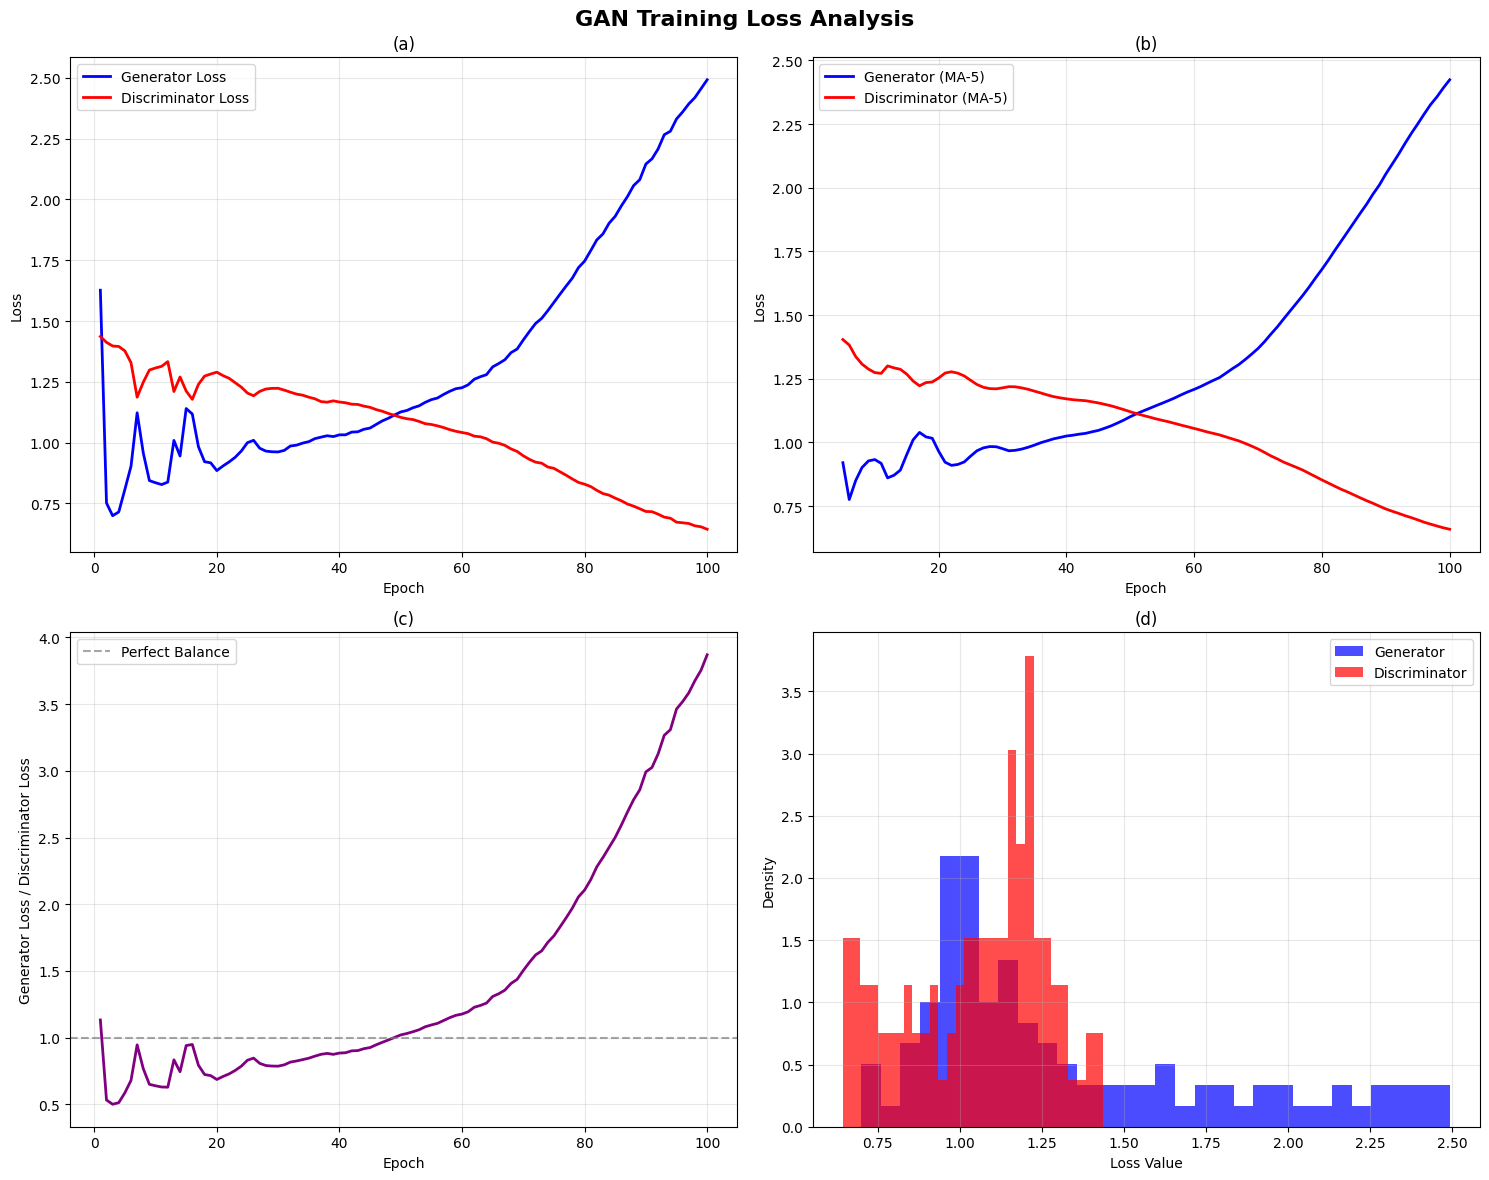


TRAINING STATISTICS
Total Epochs Trained: 100
Checkpoint Saved at Epoch: 100

GENERATOR PERFORMANCE:
  Final Loss: 2.492038
  Mean Loss: 1.332132 ± 0.471893
  Range: [0.699568, 2.492038]
  Recent Performance: 2.337245 ± 0.101128

DISCRIMINATOR PERFORMANCE:
  Final Loss: 0.643914
  Mean Loss: 1.054600 ± 0.212000
  Range: [0.643914, 1.436507]
  Recent Performance: 0.677229 ± 0.022211

CONVERGENCE ANALYSIS:
  Final G/D Ratio: 3.870
  Mean G/D Ratio: 1.431
  Recent G/D Ratio: 3.451

TRAINING QUALITY ASSESSMENT:
  ⚠️  Discriminator may be overpowering Generator
  ✅ Generator loss is stabilizing


In [55]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

def load_and_visualize_losses(checkpoint_path, save_plots=True, output_dir="/kaggle/working/"):
    """
    Load GAN training losses from checkpoint and create comprehensive visualizations
    
    Args:
        checkpoint_path (str): Path to the checkpoint file
        save_plots (bool): Whether to save plots to disk
        output_dir (str): Directory to save plots
    
    Returns:
        dict: Dictionary containing loss data and statistics
    """
    
    # Check if checkpoint exists
    if not os.path.exists(checkpoint_path):
        print(f"Error: Checkpoint file not found at {checkpoint_path}")
        return None
    
    try:
        # Load checkpoint
        print(f"Loading checkpoint from {checkpoint_path}...")
        checkpoint = torch.load(checkpoint_path, map_location='cpu')
        
        # Extract loss data
        g_losses = checkpoint.get('g_losses', [])
        d_losses = checkpoint.get('d_losses', [])
        epoch = checkpoint.get('epoch', len(g_losses))
        
        if not g_losses or not d_losses:
            print("Warning: No loss data found in checkpoint")
            return None
        
        print(f"Loaded {len(g_losses)} epochs of training data")
        print(f"Training completed up to epoch: {epoch}")
        
        # Convert to numpy arrays for easier manipulation
        g_losses = np.array(g_losses)
        d_losses = np.array(d_losses)
        epochs = np.arange(1, len(g_losses) + 1)
        
        # Create comprehensive visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('GAN Training Loss Analysis', fontsize=16, fontweight='bold')
        
        # 1. Basic Loss Curves
        axes[0, 0].plot(epochs, g_losses, label='Generator Loss', color='blue', linewidth=2)
        axes[0, 0].plot(epochs, d_losses, label='Discriminator Loss', color='red', linewidth=2)
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].set_title('(a)')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Smoothed Loss Curves (moving average)
        window_size = max(1, len(g_losses) // 20)  # 5% of total epochs
        if len(g_losses) > window_size:
            g_smooth = np.convolve(g_losses, np.ones(window_size)/window_size, mode='valid')
            d_smooth = np.convolve(d_losses, np.ones(window_size)/window_size, mode='valid')
            smooth_epochs = epochs[window_size-1:]
            
            axes[0, 1].plot(smooth_epochs, g_smooth, label=f'Generator (MA-{window_size})', color='blue', linewidth=2)
            axes[0, 1].plot(smooth_epochs, d_smooth, label=f'Discriminator (MA-{window_size})', color='red', linewidth=2)
        else:
            axes[0, 1].plot(epochs, g_losses, label='Generator Loss', color='blue', linewidth=2)
            axes[0, 1].plot(epochs, d_losses, label='Discriminator Loss', color='red', linewidth=2)
        
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Loss')
        axes[0, 1].set_title('(b)')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Loss Ratio Analysis
        # Avoid division by zero
        d_losses_safe = np.where(d_losses == 0, 1e-8, d_losses)
        loss_ratio = g_losses / d_losses_safe
        
        axes[1, 0].plot(epochs, loss_ratio, color='purple', linewidth=2)
        axes[1, 0].axhline(y=1, color='gray', linestyle='--', alpha=0.7, label='Perfect Balance')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Generator Loss / Discriminator Loss')
        axes[1, 0].set_title('(c)')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Loss Distribution
        axes[1, 1].hist(g_losses, bins=30, alpha=0.7, label='Generator', color='blue', density=True)
        axes[1, 1].hist(d_losses, bins=30, alpha=0.7, label='Discriminator', color='red', density=True)
        axes[1, 1].set_xlabel('Loss Value')
        axes[1, 1].set_ylabel('Density')
        axes[1, 1].set_title('(d)')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        
        if save_plots:
            plot_path = os.path.join(output_dir, "gan_training_analysis.png")
            plt.savefig(plot_path, dpi=300, bbox_inches='tight')
            print(f"Plot saved to: {plot_path}")
        
        plt.show()
        
        # Calculate and display statistics
        print("\n" + "="*50)
        print("TRAINING STATISTICS")
        print("="*50)
        
        # Recent performance (last 10% of training)
        recent_period = max(1, len(g_losses) // 10)
        recent_g = g_losses[-recent_period:]
        recent_d = d_losses[-recent_period:]
        
        stats = {
            'total_epochs': len(g_losses),
            'final_epoch': epoch,
            'generator_stats': {
                'final_loss': g_losses[-1],
                'mean_loss': np.mean(g_losses),
                'std_loss': np.std(g_losses),
                'min_loss': np.min(g_losses),
                'max_loss': np.max(g_losses),
                'recent_mean': np.mean(recent_g),
                'recent_std': np.std(recent_g)
            },
            'discriminator_stats': {
                'final_loss': d_losses[-1],
                'mean_loss': np.mean(d_losses),
                'std_loss': np.std(d_losses),
                'min_loss': np.min(d_losses),
                'max_loss': np.max(d_losses),
                'recent_mean': np.mean(recent_d),
                'recent_std': np.std(recent_d)
            },
            'convergence_analysis': {
                'final_loss_ratio': g_losses[-1] / max(d_losses[-1], 1e-8),
                'mean_loss_ratio': np.mean(loss_ratio),
                'recent_loss_ratio': np.mean(recent_g) / max(np.mean(recent_d), 1e-8)
            }
        }
        
        print(f"Total Epochs Trained: {stats['total_epochs']}")
        print(f"Checkpoint Saved at Epoch: {stats['final_epoch']}")
        print()
        
        print("GENERATOR PERFORMANCE:")
        print(f"  Final Loss: {stats['generator_stats']['final_loss']:.6f}")
        print(f"  Mean Loss: {stats['generator_stats']['mean_loss']:.6f} ± {stats['generator_stats']['std_loss']:.6f}")
        print(f"  Range: [{stats['generator_stats']['min_loss']:.6f}, {stats['generator_stats']['max_loss']:.6f}]")
        print(f"  Recent Performance: {stats['generator_stats']['recent_mean']:.6f} ± {stats['generator_stats']['recent_std']:.6f}")
        print()
        
        print("DISCRIMINATOR PERFORMANCE:")
        print(f"  Final Loss: {stats['discriminator_stats']['final_loss']:.6f}")
        print(f"  Mean Loss: {stats['discriminator_stats']['mean_loss']:.6f} ± {stats['discriminator_stats']['std_loss']:.6f}")
        print(f"  Range: [{stats['discriminator_stats']['min_loss']:.6f}, {stats['discriminator_stats']['max_loss']:.6f}]")
        print(f"  Recent Performance: {stats['discriminator_stats']['recent_mean']:.6f} ± {stats['discriminator_stats']['recent_std']:.6f}")
        print()
        
        print("CONVERGENCE ANALYSIS:")
        print(f"  Final G/D Ratio: {stats['convergence_analysis']['final_loss_ratio']:.3f}")
        print(f"  Mean G/D Ratio: {stats['convergence_analysis']['mean_loss_ratio']:.3f}")
        print(f"  Recent G/D Ratio: {stats['convergence_analysis']['recent_loss_ratio']:.3f}")
        
        # Training quality assessment
        print()
        print("TRAINING QUALITY ASSESSMENT:")
        final_ratio = stats['convergence_analysis']['final_loss_ratio']
        if 0.5 <= final_ratio <= 2.0:
            print("  ✅ Good balance between Generator and Discriminator")
        elif final_ratio < 0.5:
            print("  ⚠️  Generator may be overpowering Discriminator")
        else:
            print("  ⚠️  Discriminator may be overpowering Generator")
        
        if stats['generator_stats']['recent_std'] < stats['generator_stats']['std_loss']:
            print("  ✅ Generator loss is stabilizing")
        else:
            print("  ⚠️  Generator loss may still be unstable")
        
        return stats
        
    except Exception as e:
        print(f"Error loading checkpoint: {e}")
        return None


def compare_multiple_checkpoints(checkpoint_paths, labels=None):
    """
    Compare losses from multiple checkpoints
    
    Args:
        checkpoint_paths (list): List of checkpoint file paths
        labels (list): Optional labels for each checkpoint
    """
    if labels is None:
        labels = [f"Checkpoint {i+1}" for i in range(len(checkpoint_paths))]
    
    plt.figure(figsize=(15, 6))
    
    # Generator losses comparison
    plt.subplot(1, 2, 1)
    for i, (path, label) in enumerate(zip(checkpoint_paths, labels)):
        if os.path.exists(path):
            checkpoint = torch.load(path, map_location='cpu')
            g_losses = checkpoint.get('g_losses', [])
            if g_losses:
                epochs = np.arange(1, len(g_losses) + 1)
                plt.plot(epochs, g_losses, label=label, linewidth=2)
    
    plt.xlabel('Epoch')
    plt.ylabel('Generator Loss')
    plt.title('Generator Loss Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Discriminator losses comparison
    plt.subplot(1, 2, 2)
    for i, (path, label) in enumerate(zip(checkpoint_paths, labels)):
        if os.path.exists(path):
            checkpoint = torch.load(path, map_location='cpu')
            d_losses = checkpoint.get('d_losses', [])
            if d_losses:
                epochs = np.arange(1, len(d_losses) + 1)
                plt.plot(epochs, d_losses, label=label, linewidth=2)
    
    plt.xlabel('Epoch')
    plt.ylabel('Discriminator Loss')
    plt.title('Discriminator Loss Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


# Example usage:
if __name__ == "__main__":
    # Single checkpoint analysis
    checkpoint_path = "/kaggle/input/tg-gan-checkpoints/gan_transformer_checkpoint.pth"
    
    # Alternative paths you might have:
    # checkpoint_path = "/kaggle/input/my-gan-checkpoints/gan_transformer_checkpoint.pth"
    # checkpoint_path = "/kaggle/working/gan_transformer_checkpoint_epoch_50.pth"
    
    print("Analyzing GAN training checkpoint...")
    loss_stats = load_and_visualize_losses(checkpoint_path)
    
    # If you have multiple checkpoints to compare:
    # checkpoint_paths = [
    #     "/kaggle/working/gan_transformer_checkpoint_epoch_25.pth",
    #     "/kaggle/working/gan_transformer_checkpoint_epoch_50.pth",
    #     "/kaggle/working/gan_transformer_checkpoint_epoch_75.pth"
    # ]
    # labels = ["Epoch 25", "Epoch 50", "Epoch 75"]
    # compare_multiple_checkpoints(checkpoint_paths, labels)

Testing the Generator

Loading checkpoint (DataParallel status seems consistent or not applicable).
Trained generator loaded and set to evaluation mode.
Shape of generated fake EEG signals: (50, 500, 3)
Plot saved to: /kaggle/working/fake-eegsample.png


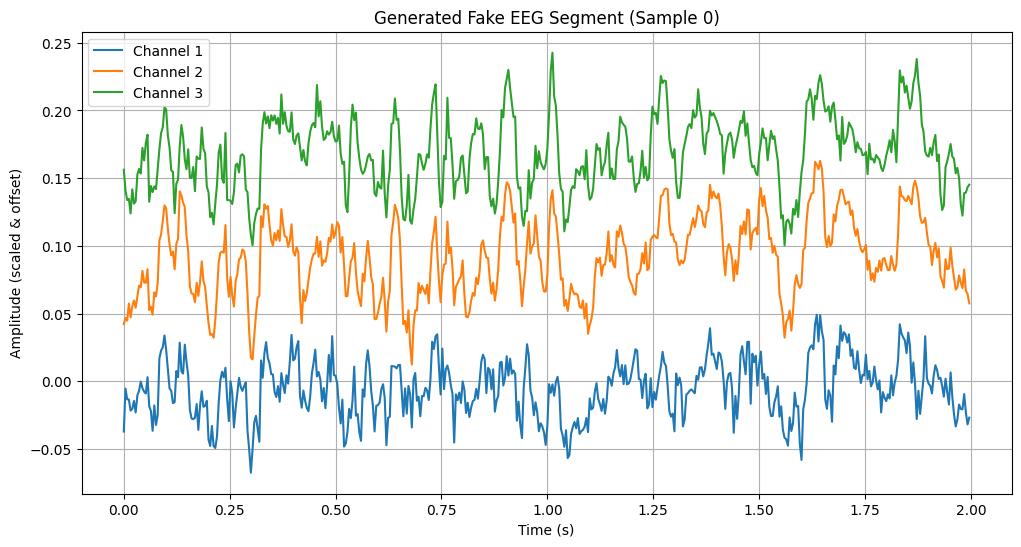

In [34]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Ensure your Generator class definition is available ---
# class Generator(nn.Module): ... (as defined before)
# class PositionalEncoding(nn.Module): ... (as defined before)

# --- Parameters (should match your trained model) ---
# These should be the same as used during training
latent_dim = 100
sequence_length = 500 # Your segment_length_samples
num_eeg_channels = 3  # Your number of EEG channels
d_model = 64
nhead = 4
num_encoder_layers_g = 3
dim_feedforward = 256
dropout = 0.1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Load the Trained Generator ---
# 1. Initialize the model structure
trained_generator = Generator(latent_dim, sequence_length, num_eeg_channels, d_model, nhead, num_encoder_layers_g, dim_feedforward, dropout)

# 2. Load the saved state dictionary
# Update this path to your best saved generator checkpoint
# checkpoint_path = "/kaggle/working/gan_transformer_checkpoint.pth" # Or a specific epoch's checkpoint
# For example, if you saved it from the training script:
checkpoint_path = "/kaggle/input/tg-gan-checkpoints/gan_transformer_checkpoint.pth" # Or the path to your best checkpoint if loaded from input
# If the checkpoint was saved from a DataParallel wrapped model:
# checkpoint = torch.load(checkpoint_path, map_location=device)
# trained_generator.load_state_dict(checkpoint['generator_state_dict']) # This assumes 'generator_state_dict' was saved from model.module.state_dict()

# More robust loading (handles DataParallel 'module.' prefix if present in checkpoint
# or if checkpoint was saved directly from model.state_dict() of DataParallel)
checkpoint = torch.load(checkpoint_path, map_location=device)
generator_state_dict = checkpoint['generator_state_dict']

# If the state_dict was saved from a DataParallel model, keys will start with 'module.'
# If your current 'trained_generator' is a base model (not wrapped), you might need to strip 'module.'
from collections import OrderedDict
new_state_dict = OrderedDict()
is_dataparallel_checkpoint = any(key.startswith('module.') for key in generator_state_dict.keys())

if is_dataparallel_checkpoint and not isinstance(trained_generator, nn.DataParallel):
    print("Loading DataParallel checkpoint into a non-DataParallel model. Stripping 'module.' prefix.")
    for k, v in generator_state_dict.items():
        name = k[7:] if k.startswith('module.') else k # remove `module.`
        new_state_dict[name] = v
    trained_generator.load_state_dict(new_state_dict)
elif not is_dataparallel_checkpoint and isinstance(trained_generator, nn.DataParallel):
    print("Loading non-DataParallel checkpoint into a DataParallel model. Adding 'module.' prefix.")
    for k, v in generator_state_dict.items():
        name = 'module.' + k 
        new_state_dict[name] = v
    trained_generator.load_state_dict(new_state_dict)
else:
    print("Loading checkpoint (DataParallel status seems consistent or not applicable).")
    trained_generator.load_state_dict(generator_state_dict)


trained_generator.to(device)
trained_generator.eval() # Set the generator to evaluation mode (disables dropout, etc.)
print("Trained generator loaded and set to evaluation mode.")

# --- Generate Fake EEG Samples ---
num_samples_to_generate = 50 # How many fake EEG segments you want
# Generate random noise vectors (latent space)
noise = torch.randn(num_samples_to_generate, latent_dim, device=device)

with torch.no_grad(): # No need to track gradients during generation
    fake_eeg_signals = trained_generator(noise) # Shape: (num_samples_to_generate, sequence_length, num_eeg_channels)
    fake_eeg_signals = fake_eeg_signals.cpu().numpy() # Move to CPU and convert to NumPy array

print(f"Shape of generated fake EEG signals: {fake_eeg_signals.shape}")

# --- Optional: Un-normalize/Un-scale the data ---
# If you scaled your real data to [-1, 1] using original_min and original_max:
# (You would have saved these values from your data preparation phase)
# For example:
# original_min_val = -0.00010000152590218967 # From your previous output
# original_max_val = 9.999847409781033e-05   # From your previous output
#
# def unscale_data(scaled_data, original_min, original_max, new_min=-1, new_max=1):
#     # First bring to [0,1] from [new_min, new_max]
#     data_01 = (scaled_data - new_min) / (new_max - new_min)
#     # Then unscale to [original_min, original_max]
#     unscaled_data = data_01 * (original_max - original_min) + original_min
#     return unscaled_data
#
# fake_eeg_unscaled = unscale_data(fake_eeg_signals, original_min_val, original_max_val)
# print("Fake EEG signals unscaled (example of first sample, first 10 points, first channel):")
# print(fake_eeg_unscaled[0, :10, 0])
save_plots=True
output_dir="/kaggle/working/"
# --- Visualize a Generated Sample ---
# Remember data is (batch, sequence_length, channels)
# We need to plot (channels, sequence_length) for one sample
# or plot each channel in the sequence.
SAMPLING_FREQUENCY = 250.0 # Your sampling frequency
time_vector = np.arange(sequence_length) / SAMPLING_FREQUENCY

plt.figure(figsize=(12, 6))
for i in range(num_eeg_channels):
    # Plotting the first generated sample
    plt.plot(time_vector, fake_eeg_signals[0, :, i] + (i * np.std(fake_eeg_signals[0, :, i]) * 3), label=f'Channel {i+1}')
plt.title(f"Generated Fake EEG Segment (Sample 0)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (scaled & offset)")
plt.legend()
plt.grid(True)
if save_plots:
        plot_path = os.path.join(output_dir, "fake-eegsample.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
plt.show()

Plot saved to: /kaggle/working/fakeVsReal-eegsample.png


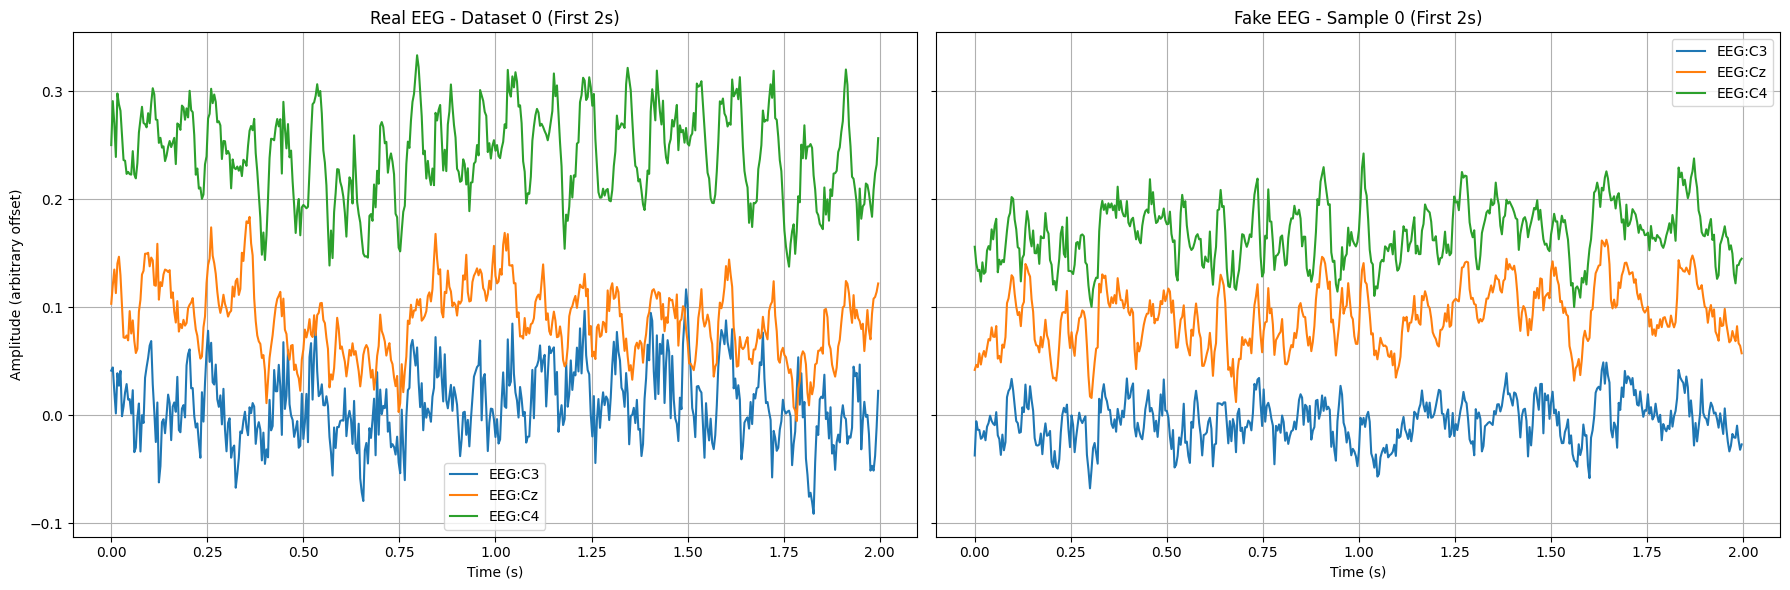

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def plot_real_and_fake_eeg(real_eeg_data, fake_eeg_data, sfreq, n_seconds=2, channel_names=None, dataset_index=0, sample_index=0):
    """
    Plots real and fake EEG segments side-by-side for comparison.
    save_plots=True
output_dir="/kaggle/working/"
    Parameters:
    - real_eeg_data: numpy array of shape (num_channels, total_samples) for real EEG
    - fake_eeg_data: numpy array of shape (num_samples, sequence_length, num_channels) for fake EEG
    - sfreq: Sampling frequency (Hz)
    - n_seconds: Duration to plot (seconds)
    - channel_names: List of channel names (optional)
    - dataset_index: Index of the real EEG dataset (for title)
    - sample_index: Index of the fake EEG sample to plot
    """
    save_plots=True
    output_dir="/kaggle/working/"
    if channel_names is None:
        channel_names = [f"Channel {i+1}" for i in range(real_eeg_data.shape[0])]
    
    num_channels = real_eeg_data.shape[0]
    time_samples_to_plot = int(n_seconds * sfreq)
    
    # Ensure we don't exceed available samples
    real_samples = real_eeg_data.shape[1]
    fake_samples = fake_eeg_data.shape[1]
    time_samples_to_plot = min(time_samples_to_plot, real_samples, fake_samples)
    
    time_vector = np.arange(time_samples_to_plot) / sfreq
    
    # Create subplots: left for real EEG, right for fake EEG
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    
    # Plot real EEG
    for i in range(num_channels):
        offset = i * np.std(real_eeg_data[i, :time_samples_to_plot]) * 3
        ax1.plot(time_vector, real_eeg_data[i, :time_samples_to_plot] + offset, label=channel_names[i])
    
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Amplitude (arbitrary offset)")
    ax1.set_title(f"Real EEG - Dataset {dataset_index} (First 2s)")
    ax1.legend()
    ax1.grid(True)
    
    # Plot fake EEG (transpose to match real EEG shape: num_channels, sequence_length)
    fake_eeg_sample = fake_eeg_data[sample_index].transpose(1, 0)  # Shape: (num_channels, sequence_length)
    for i in range(num_channels):
        offset = i * np.std(fake_eeg_sample[i, :time_samples_to_plot]) * 3
        ax2.plot(time_vector, fake_eeg_sample[i, :time_samples_to_plot] + offset, label=channel_names[i])
    
    ax2.set_xlabel("Time (s)")
    ax2.set_title(f"Fake EEG - Sample {sample_index} (First 2s)")
    ax2.legend()
    ax2.grid(True)
    if save_plots:
        plot_path = os.path.join(output_dir, "fakeVsReal-eegsample.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
    plt.tight_layout()
    plt.show()

# Example usage:
if all_eeg_data_list:
    sfreq = file_metadata[0]['sampling_frequency']  # Sampling frequency from real EEG metadata
    # Plot real EEG from dataset 0 and fake EEG from sample 0
    plot_real_and_fake_eeg(
        real_eeg_data=scaled_segmented_eeg_data[0],  # Shape: (num_channels, total_samples)
        fake_eeg_data=fake_eeg_signals,      # Shape: (num_samples, sequence_length, num_channels)
        sfreq=sfreq,
        n_seconds=5,
        channel_names=eeg_channels_of_interest,
        dataset_index=0,
        sample_index=0
    )

Now check for performance criteria
Suggestion from GPT:

2. How to Measure Performance / Evaluate Generated EEG

Evaluating GANs, especially for complex data like EEG, is challenging and an active area of research. There's no single perfect metric. You'll likely use a combination of approaches:

A. Qualitative Evaluation (Visual Inspection):

Plot Time-Domain Signals: As done above. Do they look like plausible EEG signals? Do they show oscillations, some variability, and avoid being just random noise or repetitive patterns? Compare them side-by-side with your real EEG segments.
Expert Review: If possible, show generated samples to someone experienced with EEG (a neuroscientist, clinician) for their subjective opinion.
B. Quantitative Evaluation - Statistical Similarity:

These methods compare statistical properties of the generated dataset with the real dataset.

Basic Statistics:

Calculate and compare mean, variance, skewness, and kurtosis for each channel across all your generated segments and all your real segments. They should be reasonably close.
Power Spectral Density (PSD): This is very important for EEG.

For a set of real segments and a set of generated segments, calculate the average PSD for each channel.
Plot these average PSDs. Do the generated signals exhibit power in the typical EEG frequency bands (Delta: 0.5-4 Hz, Theta: 4-8 Hz, Alpha: 8-13 Hz, Beta: 13-30 Hz, Gamma: >30 Hz)? Is the overall shape of the spectrum (e.g., 1/f characteristic) similar to real EEG?
You can use scipy.signal.welch or MNE-Python's spectral analysis tools.
Python

from scipy.signal import welch

# Example for one channel of one generated segment
# fs = SAMPLING_FREQUENCY
# freqs, psd = welch(fake_eeg_signals[0, :, 0], fs=fs, nperseg=fs) # 1-second window for welch
# plt.semilogy(freqs, psd)
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('PSD (V^2/Hz)') # Adjust unit based on unscaling
# plt.title('PSD of a Generated EEG Channel')
# plt.show()
# You'd want to average PSDs over many samples for a robust comparison
Autocorrelation & Cross-Correlation:

Compare the autocorrelation function of individual channels and cross-correlation between channels for real vs. fake data.
Time-Frequency Analysis:

Generate spectrograms (using scipy.signal.spectrogram or matplotlib.pyplot.specgram) for real and fake segments. Do they show similar energy distributions over time and frequency?
C. Quantitative Evaluation - "Train on Synthetic, Test on Real" (TSTR):

This is a very practical and often convincing evaluation method if your ultimate goal for synthetic EEG is data augmentation for a downstream task (e.g., sleep staging, seizure detection, BCI classification).

Train a classifier (or other ML model for your task) only on real EEG data (Dataset R). Test it on a held-out real test set.
Train the same classifier only on your generated fake EEG data (Dataset F). Test it on the same held-out real test set.
Train the same classifier on a mix of real and fake EEG data (Dataset R+F). Test it on the same held-out real test set.
If Model(F) performs reasonably on real test data, your GAN is capturing some useful features.
If Model(R+F) outperforms Model(R), your synthetic data provides good augmentation.
D. Quantitative Evaluation - Discriminability Tests (Advanced):

Train a Post-hoc Classifier: Train a separate, new classifier (e.g., a simple CNN or another Transformer) to try to distinguish between your real EEG segments and your best generated EEG segments. If this classifier performs poorly (accuracy around 50%), it means your generated samples are highly indistinguishable from real ones (at least to that classifier).
Fréchet Inception Distance (FID) or similar:
These metrics are popular for images but harder for EEG as they require a good feature extractor.
You could train an autoencoder on your real EEG data. Then, use the encoder part to extract feature vectors from both real and fake EEG segments. Finally, calculate the Fréchet distance between the distributions of these feature vectors. This is quite involved.
Starting Points for Evaluation:

Visual Inspection: Always start here. If it doesn't look like EEG, it's probably not good EEG.
Power Spectral Density (PSD) Comparison: This is usually the next most informative step for EEG.
If applicable, move to TSTR as it's very goal-oriented.

Plot saved to: /kaggle/working/real-and-fake-eeg-heatmaps.png


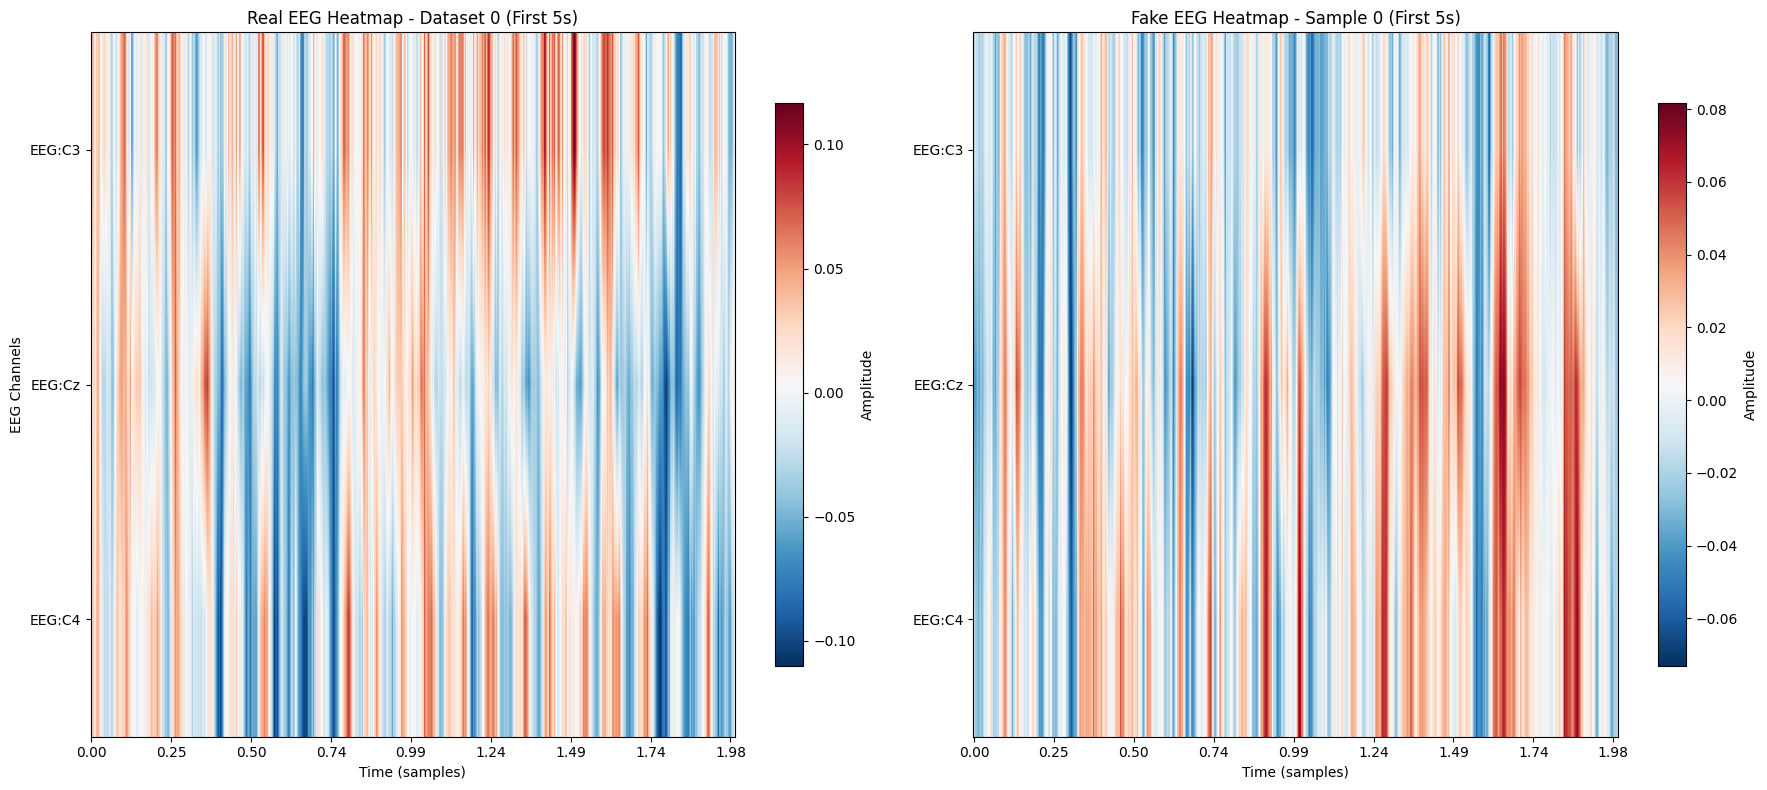

Plot saved to: /kaggle/working/multiple-sample-heatmaps.png


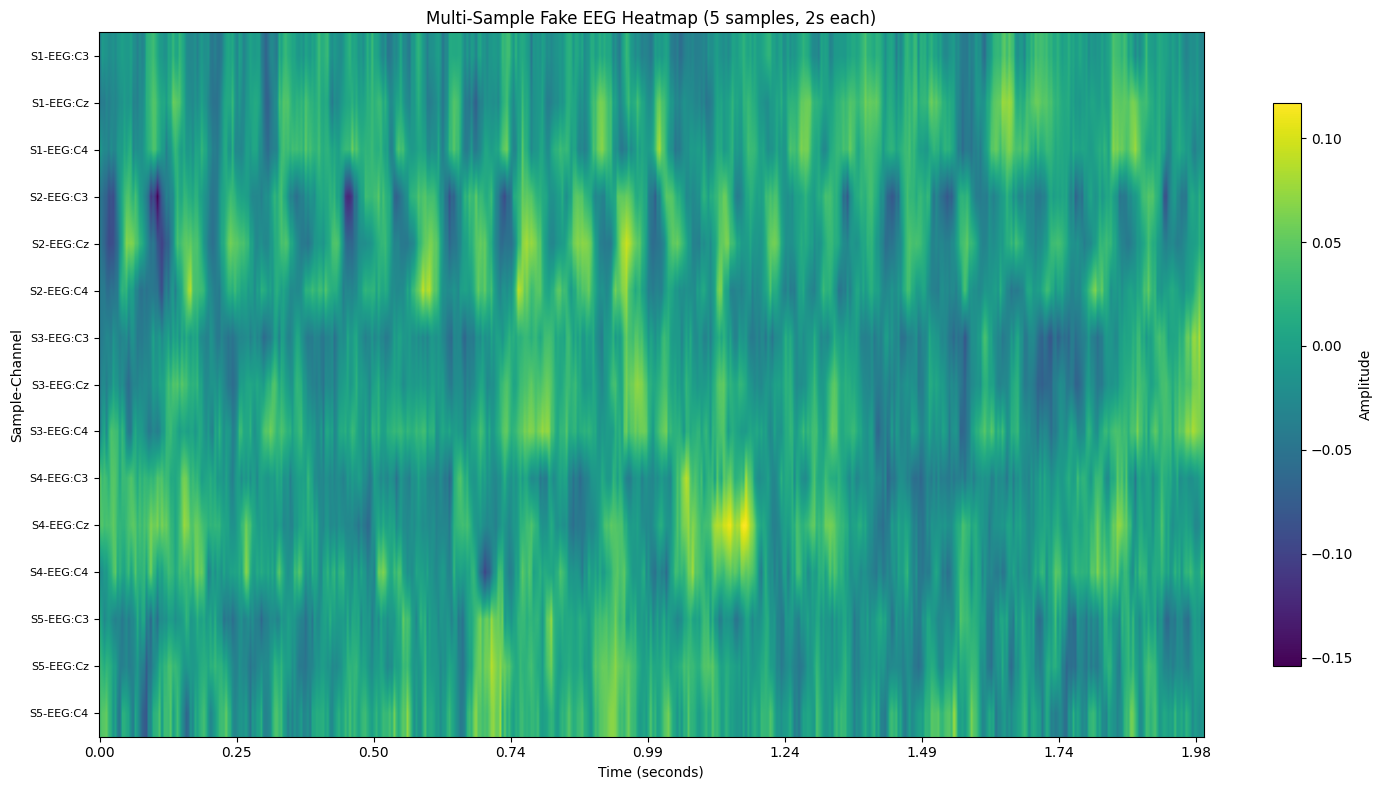

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Plot saved to: /kaggle/working/channel-cor-relation.png


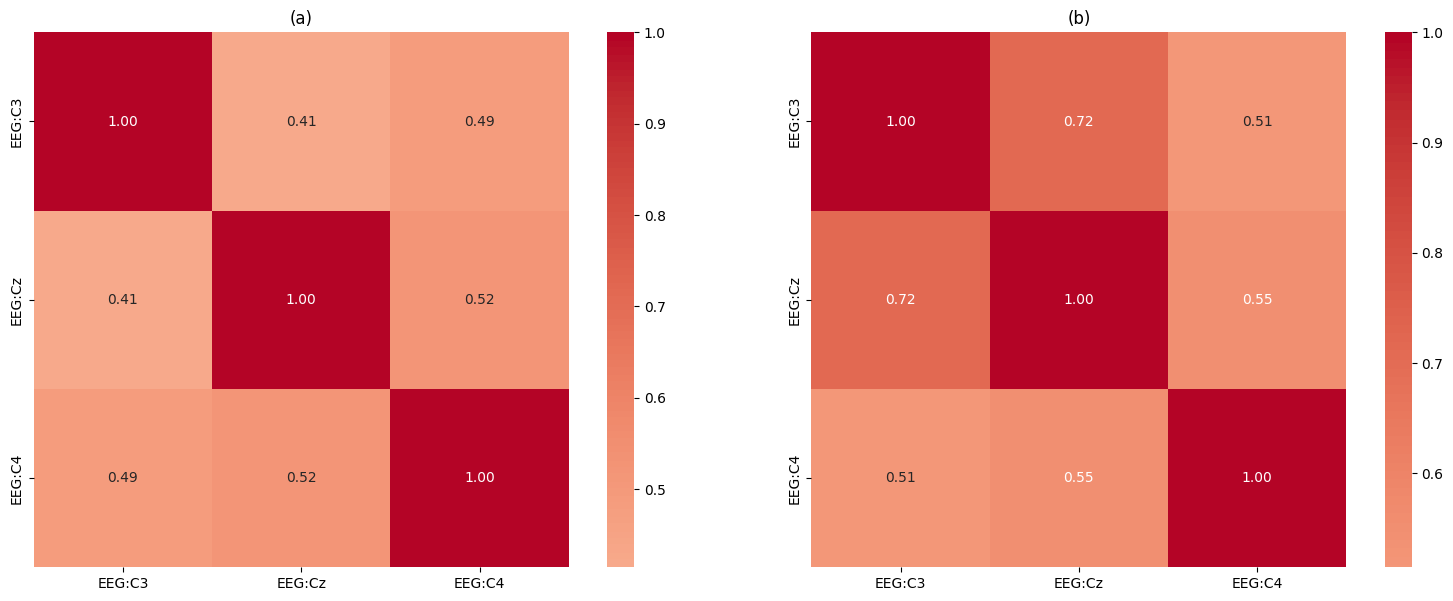

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
save_plots=True
output_dir="/kaggle/working/"

def plot_real_and_fake_eeg_heatmaps(real_eeg_data, fake_eeg_data, sfreq, n_seconds=5, channel_names=None, dataset_index=0, sample_index=0):
    """
    Plots real and fake EEG segments as heatmaps side-by-side for comparison.
    
    Parameters:
    - real_eeg_data: numpy array of shape (num_channels, total_samples) for real EEG
    - fake_eeg_data: numpy array of shape (num_samples, sequence_length, num_channels) for fake EEG
    - sfreq: Sampling frequency (Hz)
    - n_seconds: Duration to plot (seconds)
    - channel_names: List of channel names (optional)
    - dataset_index: Index of the real EEG dataset (for title)
    - sample_index: Index of the fake EEG sample to plot
    """
  
    if channel_names is None:
        channel_names = [f"Channel {i+1}" for i in range(real_eeg_data.shape[0])]
    
    num_channels = real_eeg_data.shape[0]
    time_samples_to_plot = int(n_seconds * sfreq)
    
    # Ensure we don't exceed available samples
    real_samples = real_eeg_data.shape[1]
    fake_samples = fake_eeg_data.shape[1]
    time_samples_to_plot = min(time_samples_to_plot, real_samples, fake_samples)
    
    # Create time labels for x-axis (in seconds)
    time_ticks = np.arange(0, time_samples_to_plot, int(sfreq/4))  # Tick every 0.25 seconds
    time_labels = [f"{t/sfreq:.2f}" for t in time_ticks]
    
    # Create subplots: left for real EEG, right for fake EEG
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Prepare real EEG data for heatmap
    real_eeg_segment = real_eeg_data[:, :time_samples_to_plot]
    
    # Plot real EEG heatmap
    im1 = ax1.imshow(real_eeg_segment, 
                     aspect='auto', 
                     cmap='RdBu_r', 
                     interpolation='bilinear')
    ax1.set_xlabel("Time (samples)")
    ax1.set_ylabel("EEG Channels")
    ax1.set_title(f"Real EEG Heatmap - Dataset {dataset_index} (First {n_seconds}s)")
    ax1.set_yticks(range(num_channels))
    ax1.set_yticklabels(channel_names)
    ax1.set_xticks(time_ticks)
    ax1.set_xticklabels(time_labels)
    
    # Add colorbar for real EEG
    cbar1 = plt.colorbar(im1, ax=ax1, shrink=0.8)
    cbar1.set_label('Amplitude')
    
    # Prepare fake EEG data for heatmap (transpose to match real EEG shape)
    fake_eeg_sample = fake_eeg_data[sample_index, :time_samples_to_plot, :].T  # Shape: (num_channels, time_samples)
    
    # Plot fake EEG heatmap
    im2 = ax2.imshow(fake_eeg_sample, 
                     aspect='auto', 
                     cmap='RdBu_r', 
                     interpolation='bilinear')
    ax2.set_xlabel("Time (samples)")
    ax2.set_title(f"Fake EEG Heatmap - Sample {sample_index} (First {n_seconds}s)")
    ax2.set_yticks(range(num_channels))
    ax2.set_yticklabels(channel_names)
    ax2.set_xticks(time_ticks)
    ax2.set_xticklabels(time_labels)
    
    # Add colorbar for fake EEG
    cbar2 = plt.colorbar(im2, ax=ax2, shrink=0.8)
    cbar2.set_label('Amplitude')
    
    plt.tight_layout()
    if save_plots:
        plot_path = os.path.join(output_dir, "real-and-fake-eeg-heatmaps.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
    plt.show()

def plot_multi_sample_heatmap(fake_eeg_data, sfreq, n_samples=10, n_seconds=2, channel_names=None):
    """
    Plots multiple fake EEG samples as a combined heatmap.
    
    Parameters:
    - fake_eeg_data: numpy array of shape (num_samples, sequence_length, num_channels)
    - sfreq: Sampling frequency (Hz)
    - n_samples: Number of samples to include in heatmap
    - n_seconds: Duration to plot per sample (seconds)
    - channel_names: List of channel names (optional)
    """
    num_channels = fake_eeg_data.shape[2]
    if channel_names is None:
        channel_names = [f"Ch{i+1}" for i in range(num_channels)]
    
    time_samples_to_plot = int(n_seconds * sfreq)
    n_samples = min(n_samples, fake_eeg_data.shape[0])
    
    # Create combined heatmap data
    # Shape: (n_samples * num_channels, time_samples_to_plot)
    combined_data = []
    y_labels = []
    
    for sample_idx in range(n_samples):
        for ch_idx in range(num_channels):
            combined_data.append(fake_eeg_data[sample_idx, :time_samples_to_plot, ch_idx])
            y_labels.append(f"S{sample_idx+1}-{channel_names[ch_idx]}")
    
    combined_data = np.array(combined_data)
    
    # Create time labels
    time_ticks = np.arange(0, time_samples_to_plot, int(sfreq/4))
    time_labels = [f"{t/sfreq:.2f}" for t in time_ticks]
    
    plt.figure(figsize=(15, max(8, n_samples * num_channels * 0.3)))
    im = plt.imshow(combined_data, 
                    aspect='auto', 
                    cmap='viridis', 
                    interpolation='bilinear')
    
    plt.xlabel("Time (seconds)")
    plt.ylabel("Sample-Channel")
    plt.title(f"Multi-Sample Fake EEG Heatmap ({n_samples} samples, {n_seconds}s each)")
    plt.yticks(range(len(y_labels)), y_labels, fontsize=8)
    plt.xticks(time_ticks, time_labels)
    
    # Add colorbar
    cbar = plt.colorbar(im, shrink=0.8)
    cbar.set_label('Amplitude')
    if save_plots:
        plot_path = os.path.join(output_dir, "multiple-sample-heatmaps.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
    plt.tight_layout()
    plt.show()

def plot_channel_correlation_heatmap(real_eeg_data, fake_eeg_data, channel_names=None):
    """
    Plots correlation heatmaps between channels for real and fake EEG data.
    """
    if channel_names is None:
        channel_names = [f"Ch{i+1}" for i in range(real_eeg_data.shape[0])]
    
    # Calculate correlation matrices
    real_corr = np.corrcoef(real_eeg_data)
    
    # For fake data, average across all samples first
    fake_avg = np.mean(fake_eeg_data, axis=0).T  # Shape: (num_channels, sequence_length)
    fake_corr = np.corrcoef(fake_avg)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Real EEG correlation heatmap
    sns.heatmap(real_corr, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                square=True,
                xticklabels=channel_names,
                yticklabels=channel_names,
                ax=ax1,
                fmt='.2f')
    ax1.set_title("(a)")
    
    # Fake EEG correlation heatmap
    sns.heatmap(fake_corr, 
                annot=True, 
                cmap='coolwarm', 
                center=0, 
                square=True,
                xticklabels=channel_names,
                yticklabels=channel_names,
                ax=ax2,
                fmt='.2f')
    ax2.set_title("(b)")
    if save_plots:
        plot_path = os.path.join(output_dir, "channel-cor-relation.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
    plt.tight_layout()
    plt.show()

# Example usage:
if 'all_eeg_data_list' in globals() and all_eeg_data_list:
    sfreq = file_metadata[0]['sampling_frequency']  # Sampling frequency from real EEG metadata
    
    # 1. Side-by-side heatmap comparison
    plot_real_and_fake_eeg_heatmaps(
        real_eeg_data=scaled_segmented_eeg_data[0],  # Shape: (num_channels, total_samples)
        fake_eeg_data=fake_eeg_signals,              # Shape: (num_samples, sequence_length, num_channels)
        sfreq=sfreq,
        n_seconds=5,
        channel_names=eeg_channels_of_interest,
        dataset_index=0,
        sample_index=0
    )
    
    # 2. Multi-sample heatmap
    plot_multi_sample_heatmap(
        fake_eeg_data=fake_eeg_signals,
        sfreq=sfreq,
        n_samples=5,
        n_seconds=2,
        channel_names=eeg_channels_of_interest
    )
    
    # 3. Channel correlation comparison
    plot_channel_correlation_heatmap(
        real_eeg_data=scaled_segmented_eeg_data[0],
        fake_eeg_data=fake_eeg_signals,
        channel_names=eeg_channels_of_interest
    )

time frequency analysis

Plot saved to: /kaggle/working/time-freq-analysis.png


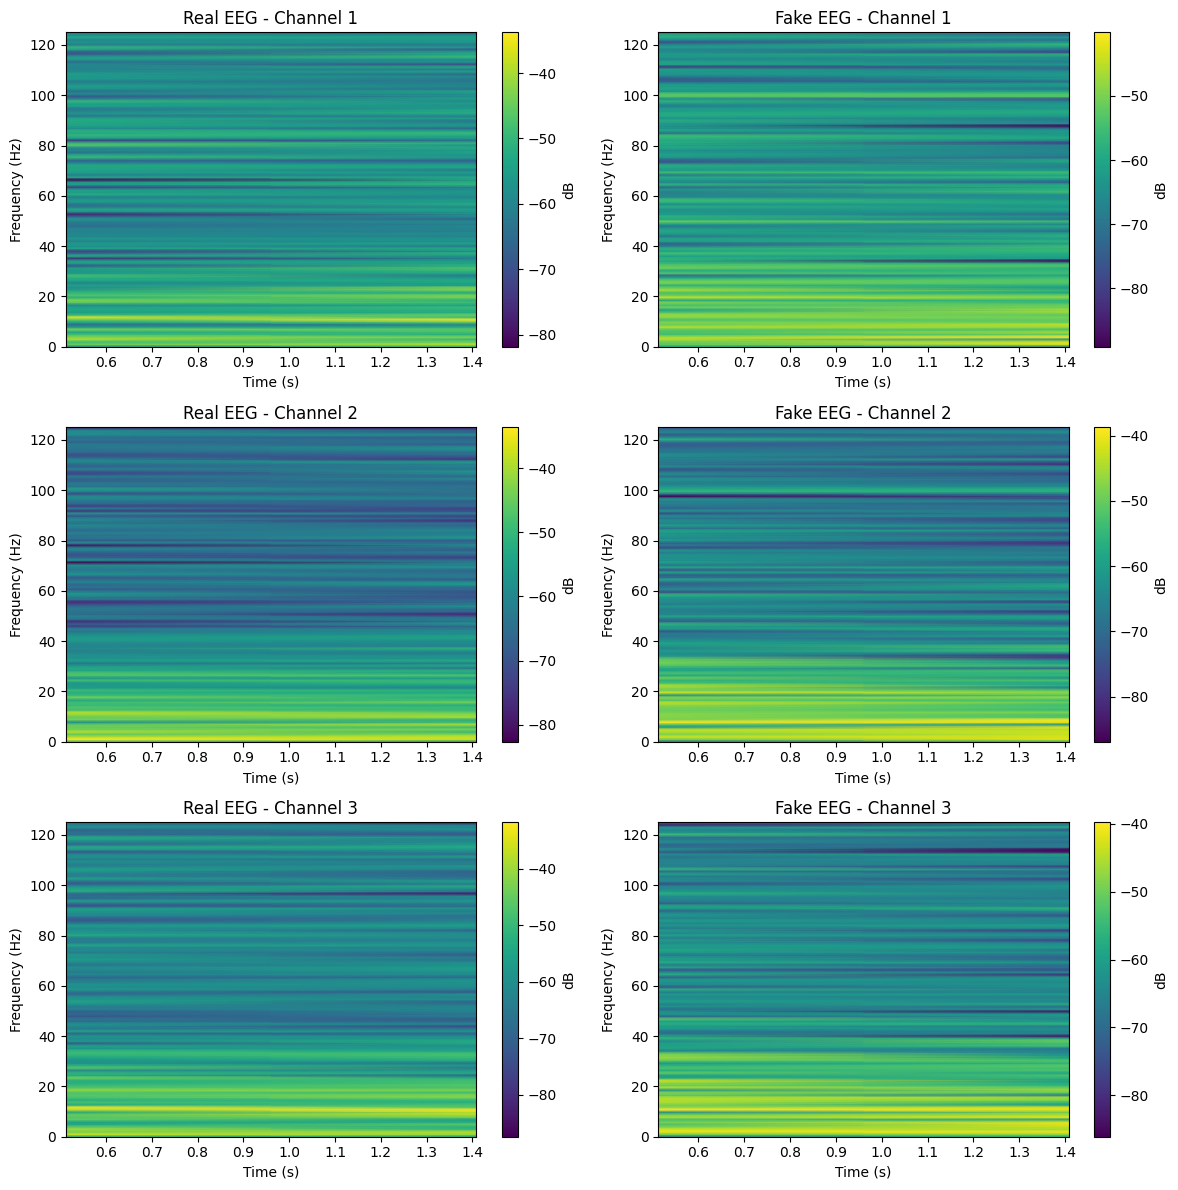

In [42]:
from scipy.signal import spectrogram
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
save_plots=True
output_dir="/kaggle/working/"
fs = 250
# scaled_segmented_eeg_data: shape (94527, 3, 500)
# fake_eeg_signals: shape (5, 500, 3)

num_eeg_channels = scaled_segmented_eeg_data.shape[1]
sequence_length = scaled_segmented_eeg_data.shape[2]

# Pick the first sample from real and fake for plotting
real_sample = scaled_segmented_eeg_data[0]  # shape (3, 500)
fake_sample = fake_eeg_signals[0]           # shape (500, 3)

plt.figure(figsize=(12, 4 * num_eeg_channels))

for ch in range(num_eeg_channels):
    # Real EEG
    f_real, t_real, Sxx_real = spectrogram(real_sample[ch], fs=fs)
    plt.subplot(num_eeg_channels, 2, 2 * ch + 1)
    plt.pcolormesh(t_real, f_real, 10 * np.log10(Sxx_real + 1e-10), shading='gouraud')
    plt.title(f'Real EEG - Channel {ch+1}')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.colorbar(label='dB')

    # Fake EEG
    f_fake, t_fake, Sxx_fake = spectrogram(fake_sample[:, ch], fs=fs)
    plt.subplot(num_eeg_channels, 2, 2 * ch + 2)
    plt.pcolormesh(t_fake, f_fake, 10 * np.log10(Sxx_fake + 1e-10), shading='gouraud')
    plt.title(f'Fake EEG - Channel {ch+1}')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.colorbar(label='dB')

plt.tight_layout()
if save_plots:
        plot_path = os.path.join(output_dir, "time-freq-analysis.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
plt.show()

Power Spectral Density (PSD)

Plot saved to: /kaggle/working/PSD.png


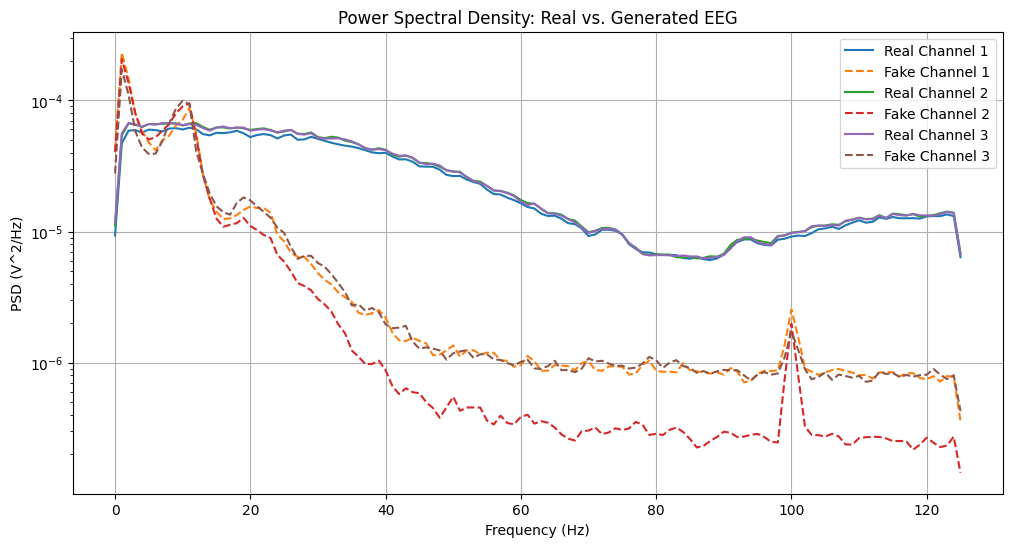

In [43]:
from scipy.signal import welch
import matplotlib.pyplot as plt

fs = SAMPLING_FREQUENCY  # 250 Hz
plt.figure(figsize=(12, 6))
for ch in range(num_eeg_channels):
    # Average PSD for real EEG
    freqs, psd_real = welch(scaled_segmented_eeg_data[:, :, ch].flatten(), fs=fs, nperseg=fs)
    plt.semilogy(freqs, psd_real, label=f'Real Channel {ch+1}')
    # Average PSD for generated EEG
    freqs, psd_fake = welch(fake_eeg_signals[:, :, ch].flatten(), fs=fs, nperseg=fs)
    plt.semilogy(freqs, psd_fake, label=f'Fake Channel {ch+1}', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.title('Power Spectral Density: Real vs. Generated EEG')
plt.legend()
if save_plots:
        plot_path = os.path.join(output_dir, "PSD.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
plt.grid(True)
plt.show()

Autocorrelation and Cross-Correlation

In [45]:
import numpy as np

def compute_autocorr(data, max_lag=100, data_format='real'):
    """
    Computes average normalized autocorrelation for each channel.
    
    Parameters:
    - data: numpy array of EEG data
    - max_lag: number of lags to compute
    - data_format: 'real' for (samples, channels, time), 'fake' for (samples, time, channels)
    
    Returns:
    - mean autocorrelation array of shape (max_lag,)
    """
    autocorr = []

    for sample in data:
        if data_format == 'real':  # shape = (samples, channels, time)
            for ch in range(sample.shape[0]):
                signal = sample[ch, :]
        elif data_format == 'fake':  # shape = (samples, time, channels)
            for ch in range(sample.shape[1]):
                signal = sample[:, ch]
        else:
            raise ValueError("Invalid data_format. Use 'real' or 'fake'.")

            # Full autocorrelation
            full_corr = np.correlate(signal, signal, mode='full')
            center = len(full_corr) // 2
            segment = full_corr[center:center+max_lag]

            # Normalize
            segment = segment / full_corr[center] if full_corr[center] != 0 else np.zeros(max_lag)
            autocorr.append(segment)

    return np.mean(autocorr, axis=0)

Plot saved to: /kaggle/working/auto-correlation.png


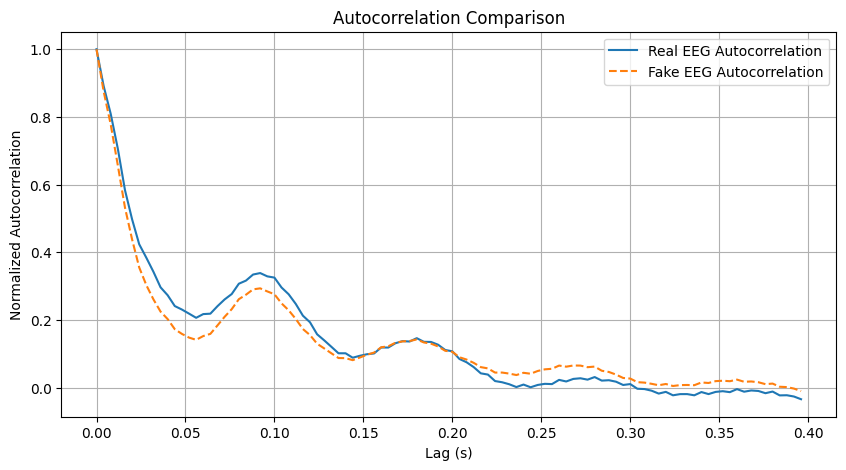

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
max_lag = 100
SAMPLING_FREQUENCY = 250  # update this if different

# Function
def compute_autocorr(data, max_lag=100, data_format='real'):
    autocorr = []
    if data_format == 'real':  # (samples, channels, time)
        for sample in data:
            for ch in range(sample.shape[0]):
                signal = sample[ch, :]
                if np.all(signal == 0): continue  # skip empty/zero signals
                full_corr = np.correlate(signal, signal, mode='full')
                center = len(full_corr) // 2
                segment = full_corr[center:center + max_lag]
                if full_corr[center] != 0:
                    segment = segment / full_corr[center]
                    autocorr.append(segment)
    elif data_format == 'fake':  # (samples, time, channels)
        for sample in data:
            for ch in range(sample.shape[1]):
                signal = sample[:, ch]
                if np.all(signal == 0): continue
                full_corr = np.correlate(signal, signal, mode='full')
                center = len(full_corr) // 2
                segment = full_corr[center:center + max_lag]
                if full_corr[center] != 0:
                    segment = segment / full_corr[center]
                    autocorr.append(segment)
    else:
        raise ValueError("data_format must be 'real' or 'fake'")
    
    if len(autocorr) == 0:
        return np.zeros(max_lag)
    
    return np.mean(autocorr, axis=0)

# Run computation
autocorr_real = compute_autocorr(scaled_segmented_eeg_data, max_lag=max_lag, data_format='real')
autocorr_fake = compute_autocorr(fake_eeg_signals, max_lag=max_lag, data_format='fake')

# Lags in seconds
lags = np.arange(0, max_lag) / SAMPLING_FREQUENCY

# Plot
plt.figure(figsize=(10, 5))
plt.plot(lags, autocorr_real, label='Real EEG Autocorrelation')
plt.plot(lags, autocorr_fake, label='Fake EEG Autocorrelation', linestyle='--')
plt.xlabel('Lag (s)')
plt.ylabel('Normalized Autocorrelation')
plt.title('Autocorrelation Comparison')
plt.legend()
plt.grid(True)
if save_plots:
        plot_path = os.path.join(output_dir, "auto-correlation.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
plt.show()

per channel correlation

Plot saved to: /kaggle/working/per channel-auto-correlation.png


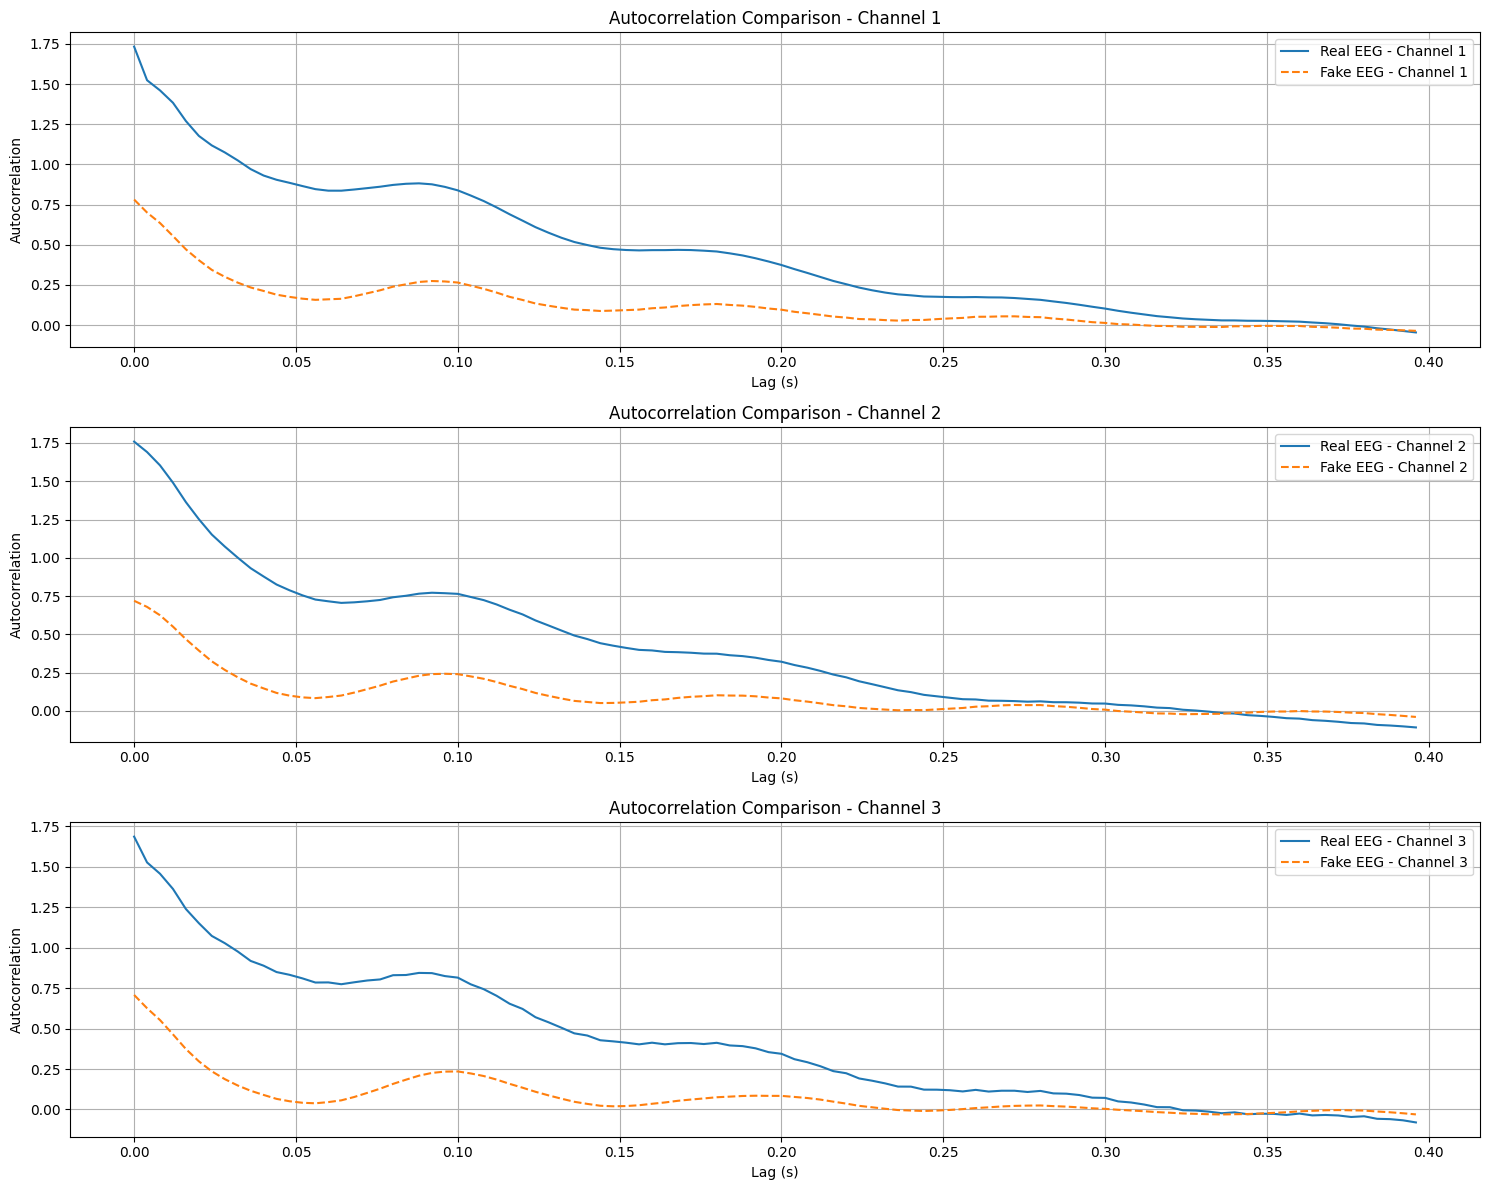

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sequence_length = 500
max_lag = 100
fs = SAMPLING_FREQUENCY  # Set your sampling frequency, e.g., 250
num_channels = scaled_segmented_eeg_data.shape[1]

def compute_autocorr_per_channel(data, max_lag, is_fake=False):
    # Output: shape (channels, max_lag)
    channel_autocorr = []

    for ch in range(num_channels):
        acc = []
        for i in range(len(data)):
            if is_fake:
                signal = data[i, :, ch]  # shape: (time,)
            else:
                signal = data[i, ch, :]  # shape: (time,)
            corr = np.correlate(signal, signal, mode='full')
            mid = len(corr) // 2
            acc.append(corr[mid:mid+max_lag])
        acc = np.stack(acc)
        channel_autocorr.append(np.mean(acc, axis=0))
    return np.stack(channel_autocorr)

# Compute autocorrelations
autocorr_real = compute_autocorr_per_channel(scaled_segmented_eeg_data, max_lag)
autocorr_fake = compute_autocorr_per_channel(fake_eeg_signals, max_lag, is_fake=True)

lags = np.arange(0, max_lag) / fs

# Plotting
plt.figure(figsize=(15, 4 * num_channels))
for ch in range(num_channels):
    plt.subplot(num_channels, 1, ch + 1)
    plt.plot(lags, autocorr_real[ch], label=f'Real EEG - Channel {ch+1}')
    plt.plot(lags, autocorr_fake[ch], label=f'Fake EEG - Channel {ch+1}', linestyle='--')
    plt.xlabel('Lag (s)')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation Comparison - Channel {ch+1}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
if save_plots:
        plot_path = os.path.join(output_dir, "per channel-auto-correlation.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
plt.show()

Alpha,beta, gamma comparison

Plot saved to: /kaggle/working/band-power-analysisn.png


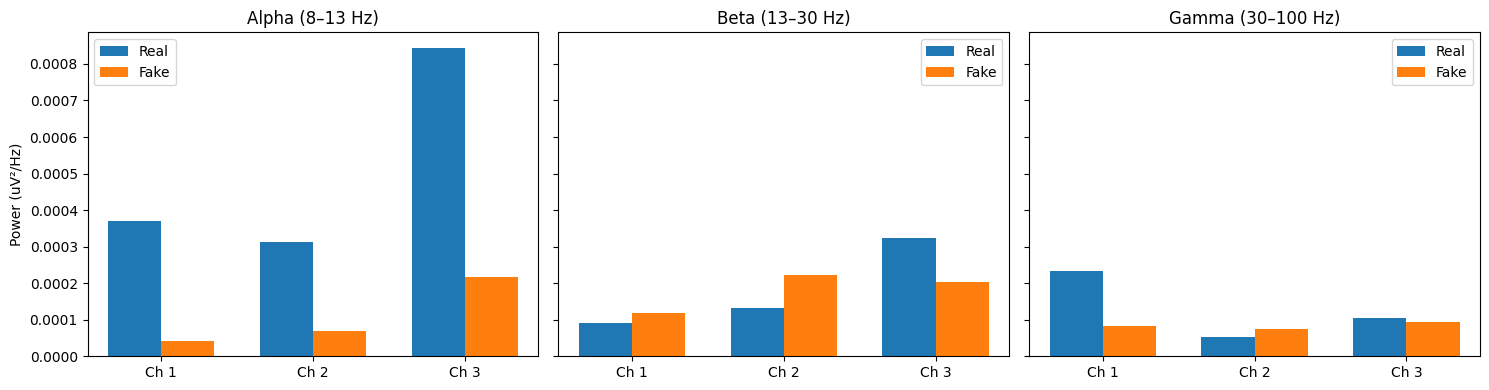

In [50]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# Parameters
fs = 250  # Sampling frequency (Hz)
bands = {
    'Alpha (8–13 Hz)': (8, 13),
    'Beta (13–30 Hz)': (13, 30),
    'Gamma (30–100 Hz)': (30, 100)
}
num_channels = 3

# Select a sample EEG signal
real_sample = scaled_segmented_eeg_data[0]    # shape (3, 500)
fake_sample = fake_eeg_signals[0].T           # reshape (3, 500) to match real

# Band power computation
def compute_band_power(data, fs, band):
    f, psd = welch(data, fs=fs, nperseg=256)
    freq_res = f[1] - f[0]
    idx_band = np.logical_and(f >= band[0], f <= band[1])
    band_power = np.sum(psd[:, idx_band], axis=1) * freq_res
    return band_power

# Prepare band powers
real_band_powers = {}
fake_band_powers = {}

for band_name, band_range in bands.items():
    real_band_powers[band_name] = compute_band_power(real_sample, fs, band_range)
    fake_band_powers[band_name] = compute_band_power(fake_sample, fs, band_range)

# Plot all in one row
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
channels = [f'Ch {i+1}' for i in range(num_channels)]
x = np.arange(num_channels)
width = 0.35

for idx, (band_name, _) in enumerate(bands.items()):
    ax = axes[idx]
    ax.bar(x - width/2, real_band_powers[band_name], width, label='Real')
    ax.bar(x + width/2, fake_band_powers[band_name], width, label='Fake')
    ax.set_title(band_name)
    ax.set_xticks(x)
    ax.set_xticklabels(channels)
    if idx == 0:
        ax.set_ylabel('Power (uV²/Hz)')
    ax.legend()

plt.tight_layout()
if save_plots:
        plot_path = os.path.join(output_dir, "band-power-analysisn.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
plt.show()


Frechet distance

In [52]:
!pip install frechetdist


Plot saved to: /kaggle/working/FD.png


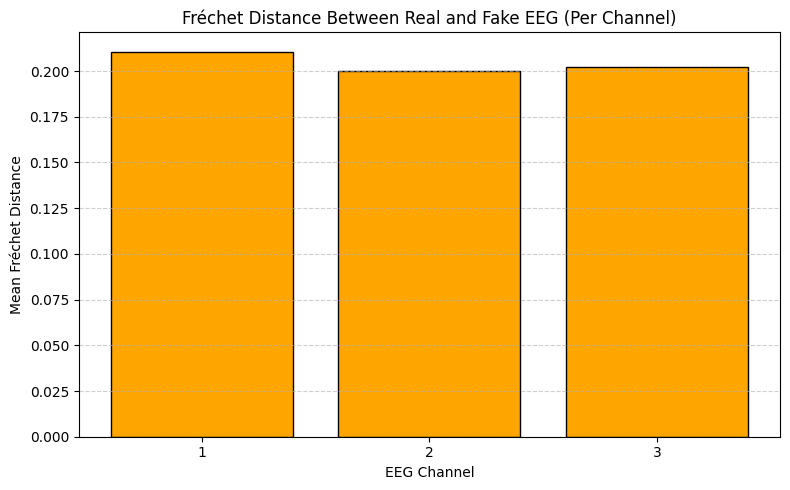

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from frechetdist import frdist

# Parameters
num_fake = fake_eeg_signals.shape[0]
sequence_length = fake_eeg_signals.shape[1]
num_channels = fake_eeg_signals.shape[2]

# Match number of real samples
random_indices = np.random.choice(scaled_segmented_eeg_data.shape[0], num_fake, replace=False)
real_samples = scaled_segmented_eeg_data[random_indices]  # shape (5, 3, 500)

# Transpose to shape (5, 500, 3) to match fake
real_samples = np.transpose(real_samples, (0, 2, 1))

# Fréchet distance matrix: (samples, channels)
frechet_distances = np.zeros((num_fake, num_channels))

for i in range(num_fake):
    for ch in range(num_channels):
        real_curve = np.column_stack((np.arange(sequence_length), real_samples[i, :, ch]))
        fake_curve = np.column_stack((np.arange(sequence_length), fake_eeg_signals[i, :, ch]))
        frechet_distances[i, ch] = frdist(real_curve, fake_curve)

# Average across samples
mean_distances = np.mean(frechet_distances, axis=0)

# Plot
channels = np.arange(1, num_channels + 1)
plt.figure(figsize=(8, 5))
plt.bar(channels, mean_distances, color='orange', edgecolor='black')
plt.xticks(channels)
plt.xlabel("EEG Channel")
plt.ylabel("Mean Fréchet Distance")
plt.title("Fréchet Distance Between Real and Fake EEG (Per Channel)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
if save_plots:
        plot_path = os.path.join(output_dir, "FD.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
plt.show()


per channel fd

Plot saved to: /kaggle/working/FD_persample.png


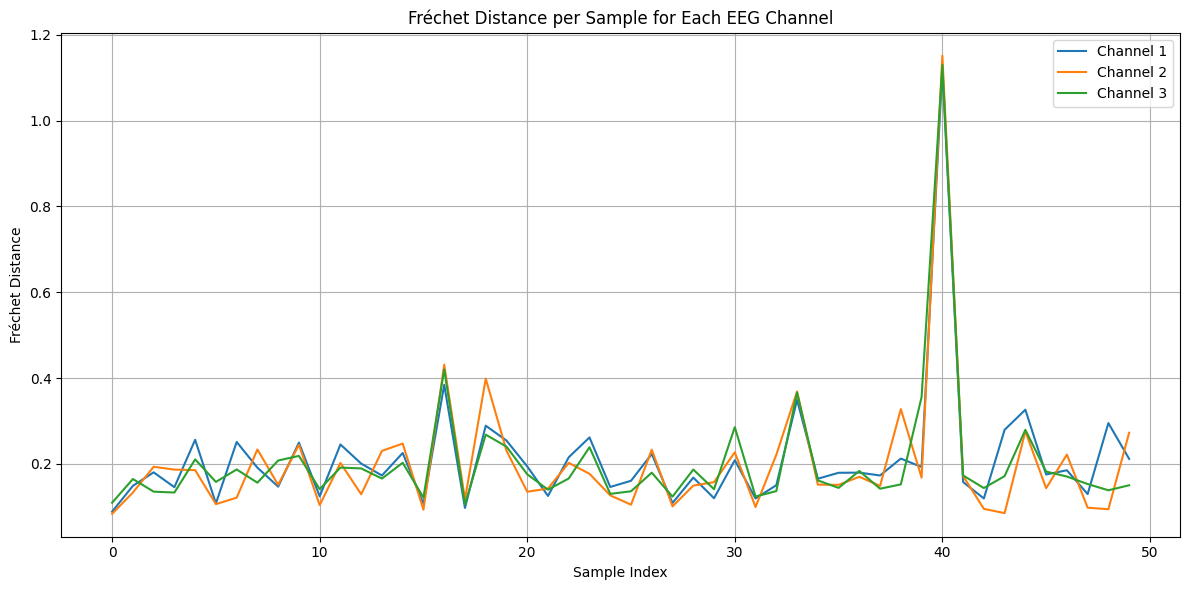

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from frechetdist import frdist

# Example shapes
# real_samples.shape = (100, 500, 3)
# fake_eeg_signals.shape = (100, 500, 3)

num_samples, time_steps, num_channels = real_samples.shape
frechet_distances = np.zeros((num_samples, num_channels))

# Compute Fréchet distance per sample per channel
for i in range(num_samples):
    for ch in range(num_channels):
        real_curve = np.column_stack((np.arange(time_steps), real_samples[i, :, ch]))
        fake_curve = np.column_stack((np.arange(time_steps), fake_eeg_signals[i, :, ch]))
        frechet_distances[i, ch] = frdist(real_curve, fake_curve)

# Plot
plt.figure(figsize=(12, 6))
for ch in range(num_channels):
    plt.plot(range(num_samples), frechet_distances[:, ch], label=f'Channel {ch+1}')

plt.title('Fréchet Distance per Sample for Each EEG Channel')
plt.xlabel('Sample Index')
plt.ylabel('Fréchet Distance')
plt.legend()
plt.grid(True)
plt.tight_layout()
if save_plots:
        plot_path = os.path.join(output_dir, "FD_persample.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {plot_path}")
plt.show()